In [26]:
# Libraries
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import func # importa função criada

from matplotlib import pyplot as plt
from datetime import date as dt
from pandas.api.types import CategoricalDtype

sns.set_theme(style="darkgrid")
# white, dark, whitegrid, darkgrid, ticks
sns.set(rc={'figure.figsize': (14, 8)})

# Configuração pandas",
pd.set_option("display.precision", 2)

In [27]:
# Leitura dos dados direto do site
df = pd.read_excel('https://query.data.world/s/vcpijynjkuc3ccycxh62juwmnitj6t?dws=00000')

# Conhecendo um pouco sobre os dados

In [28]:
df.head(3)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly


In [29]:
df.isna().sum()

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

In [31]:
# Cria categoria Year
df['Year'] = df['Year'].astype('category')

---

# 1- Qual a quantidade de incidentes por gênero?

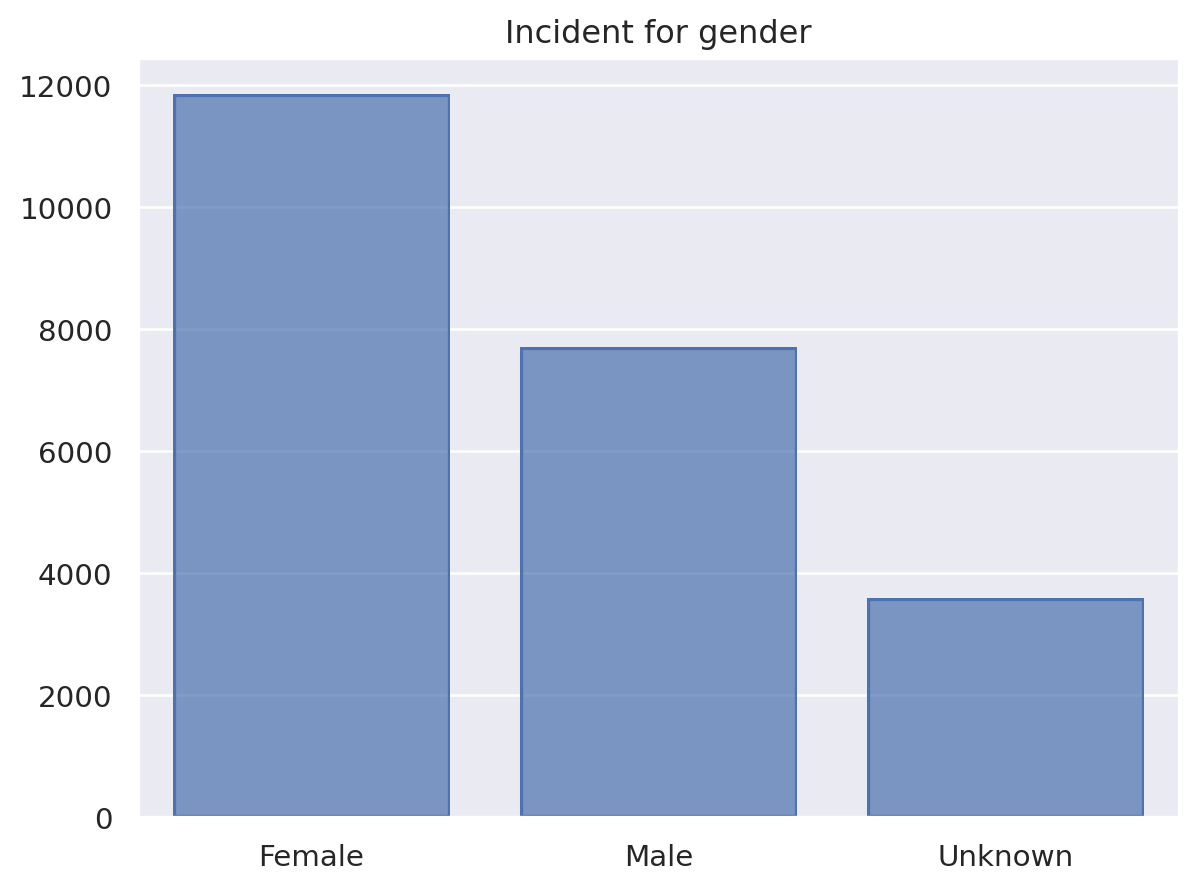

In [32]:
(
    so.Plot(df['Victims Sex'].sort_values())
    .add(so.Bar(), so.Count())
    .label(x='', y='',title= 'Incident for gender')
)

In [33]:
Victims_Sex = df['Victims Sex'].value_counts()
Victims_Sex

Victims Sex
Female     11847
Male        7709
Unknown     3602
Name: count, dtype: int64

---

# 2- Qual faixa etária esteve mais envolvida nos incidentes?

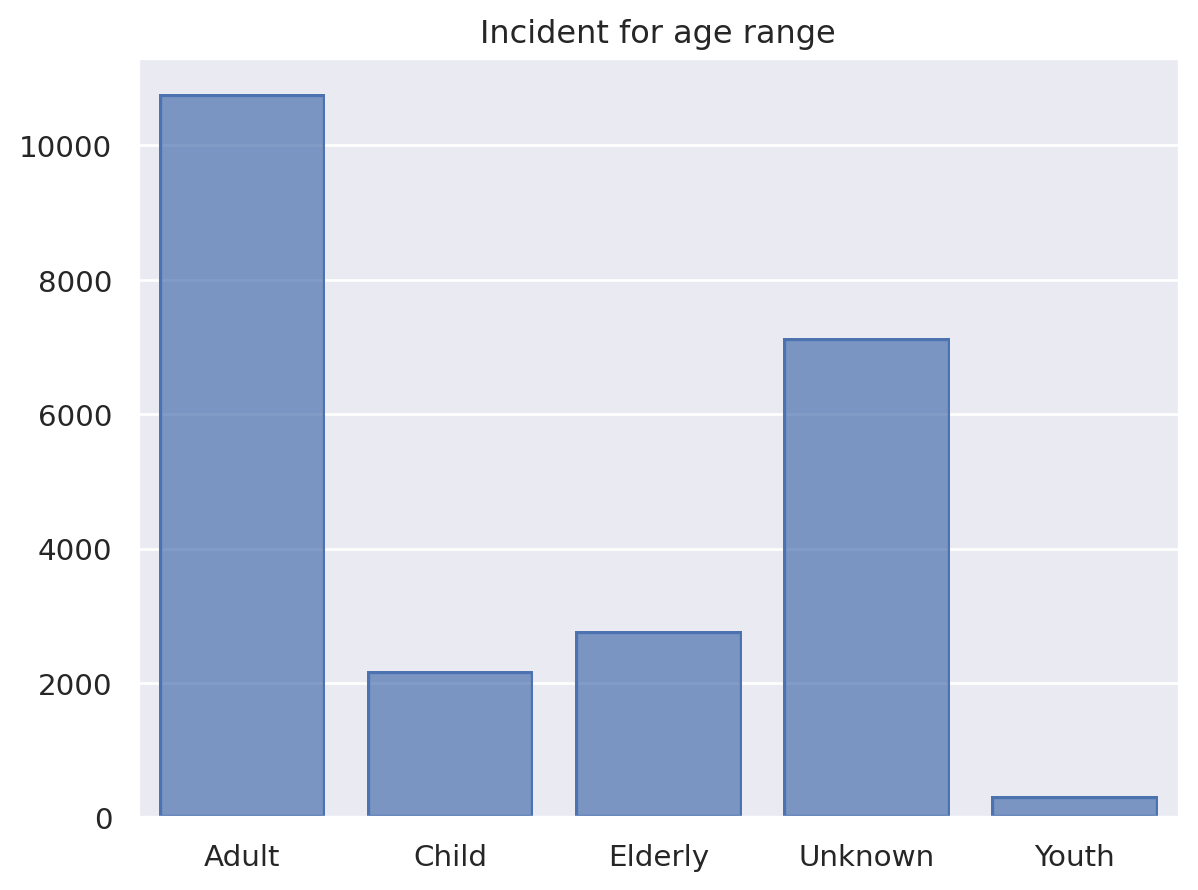

In [34]:
(
    so.Plot(df['Victims Age'].sort_values())
    .add(so.Bar(), so.Count())
    .label(x='', y='', title='Incident for age range')
)

In [35]:
df['Victims Age'].value_counts()

Victims Age
Adult      10754
Unknown     7135
Elderly     2769
Child       2181
Youth        319
Name: count, dtype: int64

Observamos **10.754 ocorrências** envolvendo adultos. E a segunda faixa com 7.135, a qual não conhecemos a classificação etária, é bastante provável que haja um grande número de adultos também nesta faixa.  
É esperado um maior número de incidentes com esta faixa, pois provavelmente deve ser a faixa etária com maior fluxo no transporte.

---

# 3- Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

In [36]:
df.shape

(23158, 12)

In [37]:
df_getype = pd.DataFrame(df.groupby(['Incident Event Type'], observed=True, as_index=False)['Year'].count()).sort_values(by='Year', ascending=False)

In [38]:
df_getype['Percent'] = (df_getype['Year'] / df.shape[0]) * 100

In [39]:
df_getype

,Incident Event Type,Year,Percent
8,Slip Trip Fall,6981,30.15
4,Onboard Injuries,6563,28.34
5,Personal Injury,4596,19.85
2,Collision Incident,4166,17.99
1,Assault,590,2.55
0,Activity Incident Event,114,0.49
9,Vandalism Hooliganism,73,0.32
7,Safety Critical Failure,66,0.28
3,Fire,6,0.03
6,Robbery,3,0.01


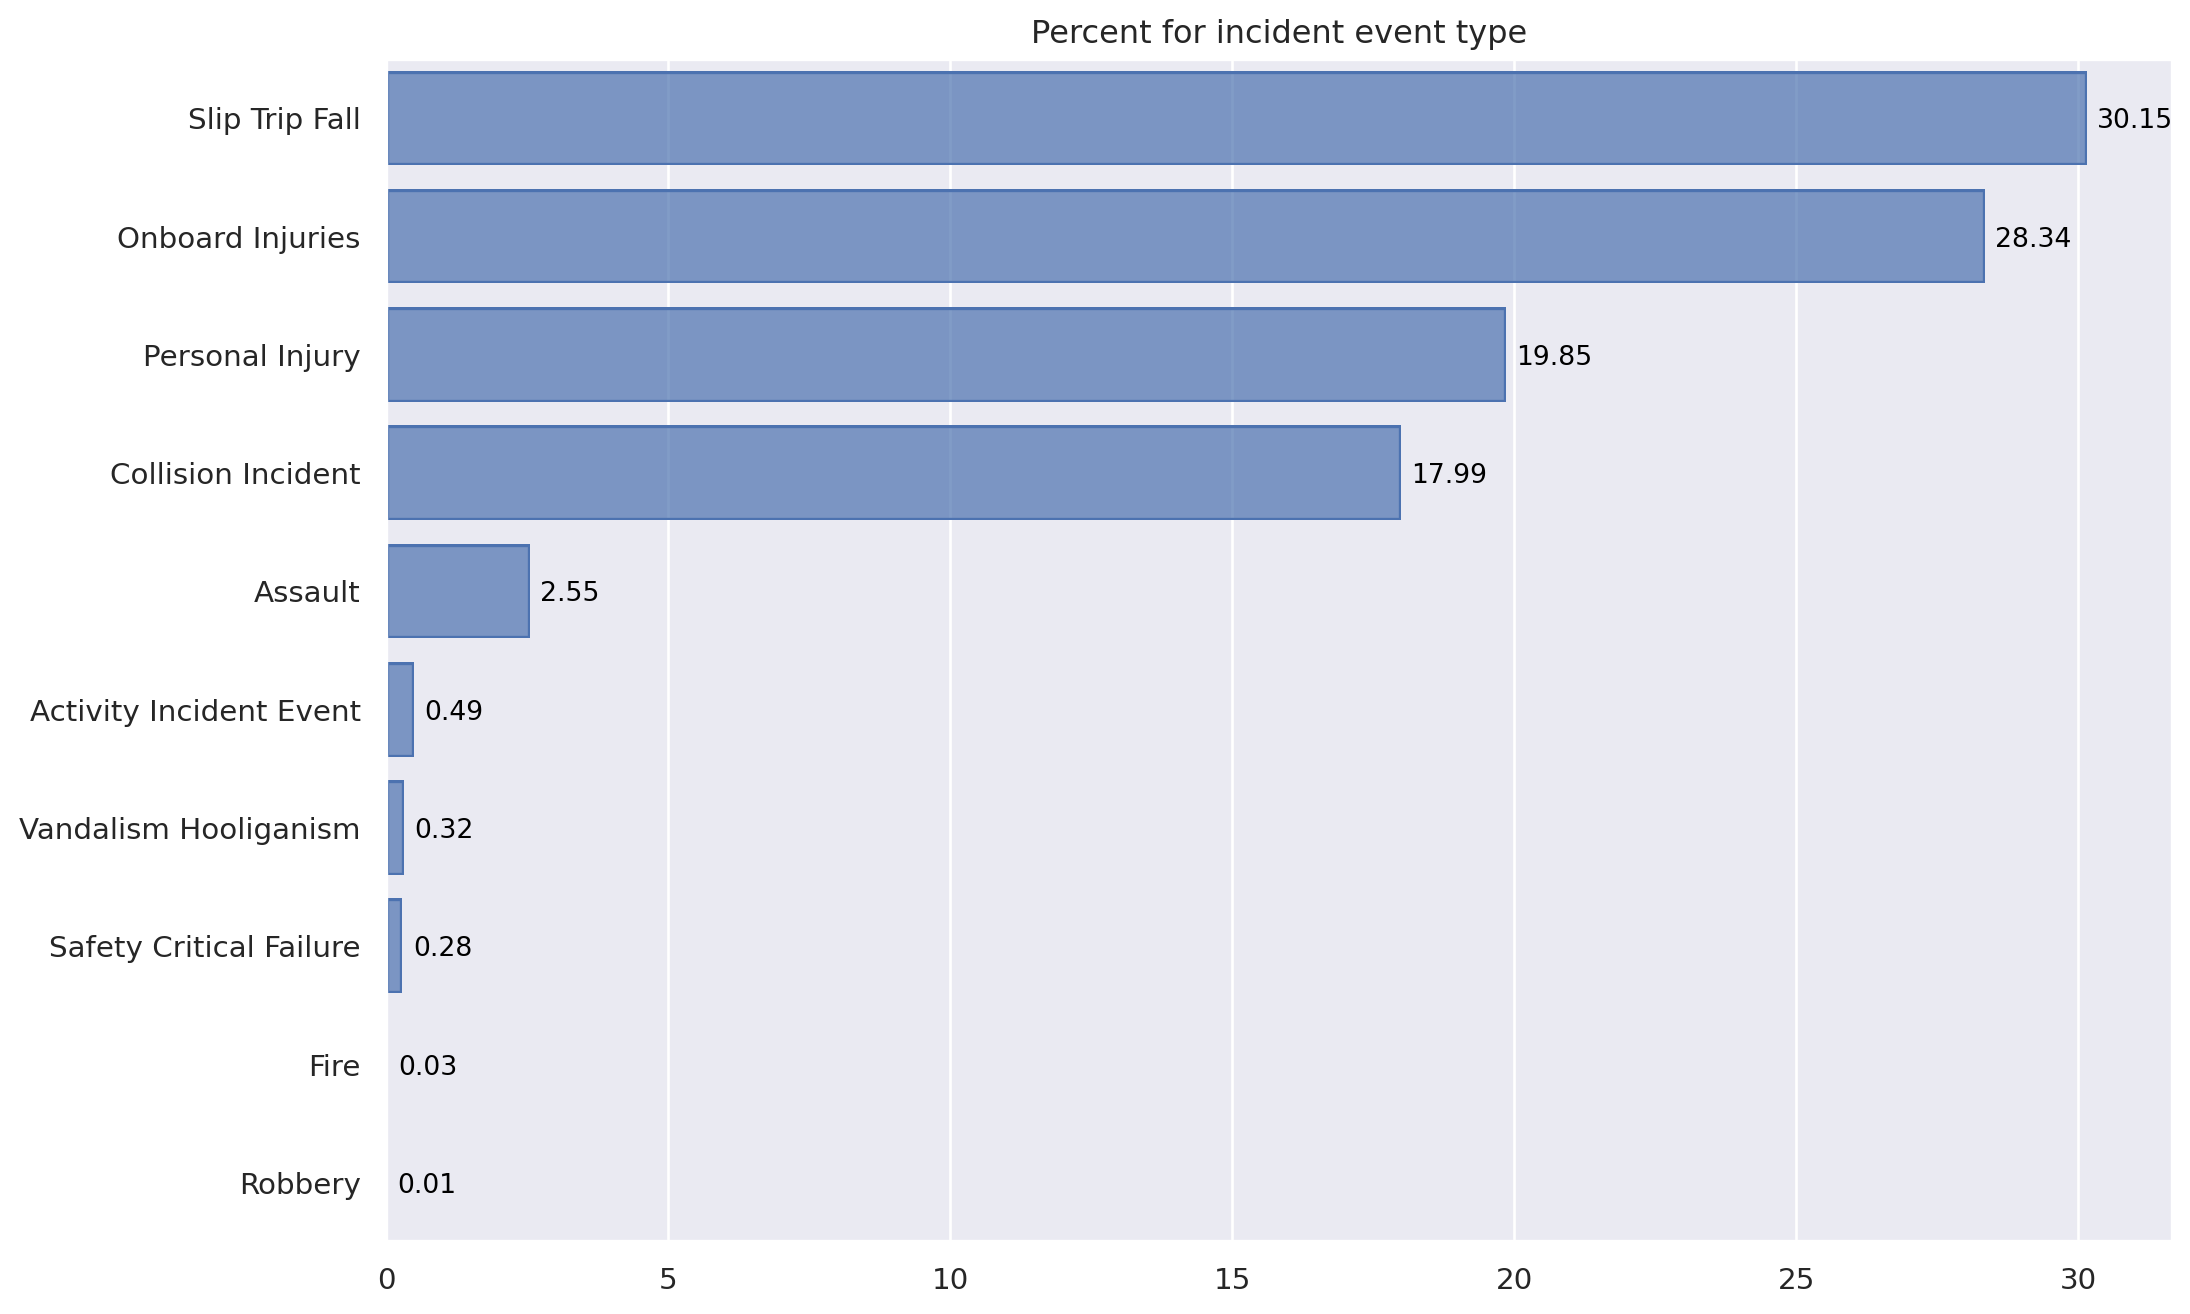

In [40]:
(
    so.Plot(df_getype['Percent'], df_getype['Incident Event Type'], 
        text=df_getype['Percent'].apply(func.formata_numero))
    .add(so.Bar())
    .add(so.Text(color='black', halign="left", fontsize=10))
    .layout(size=(12, 8), engine='none')
    .label(x='', y='', title='Percent for incident event type')
)

Com 30,15% dos casos temos escorregões, quedas e tropeços o que representa um percentual bastante expressivo dos incidentes.  
Isto abre um alerta com relação a procurrar mecanismos para a diminuição destes acidentes.    
Talvez, melhorar o grip do piso, aumentar a quantidade de lugares para apoio, criar mais informações visuais para os passageiros, melhorar treinamento dos staffs com relação a prevenção de quedas dos usuários. 

---

# 4- Como foi a evolução de incidentes por mês ao longo do tempo?

In [41]:
# Extrai da variável Data o mês
month = df['Date Of Incident'].dt.strftime('%b')

In [42]:
# Insere o mês extraido na segunda coluna do dataframe 
df.insert(1, 'Month', month)

In [43]:
df.head(2)

,Year,Month,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,Jan,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,Jan,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown


In [44]:
# Ordem dos meses
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [45]:
# Organiza ordem dos meses
cat_month_order = CategoricalDtype(categories=month_order, ordered=True)

In [46]:
# Cria categoria ordenada
df['Month'] = df.Month.astype(cat_month_order)

In [47]:
df.Month.head(2)

0    Jan
1    Jan
Name: Month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [48]:
# Seleciona colunas e cria lista
categ = df.iloc[:, 3:].columns.to_list()

In [49]:
# Cria categorias das colunas selecionadas
df[categ] = df[categ].astype('category')

In [50]:
# Agrupamento para criação do gráfico
count_incident = df.groupby(['Date Of Incident', 'Year', 'Month'], as_index=False, observed=True).count()

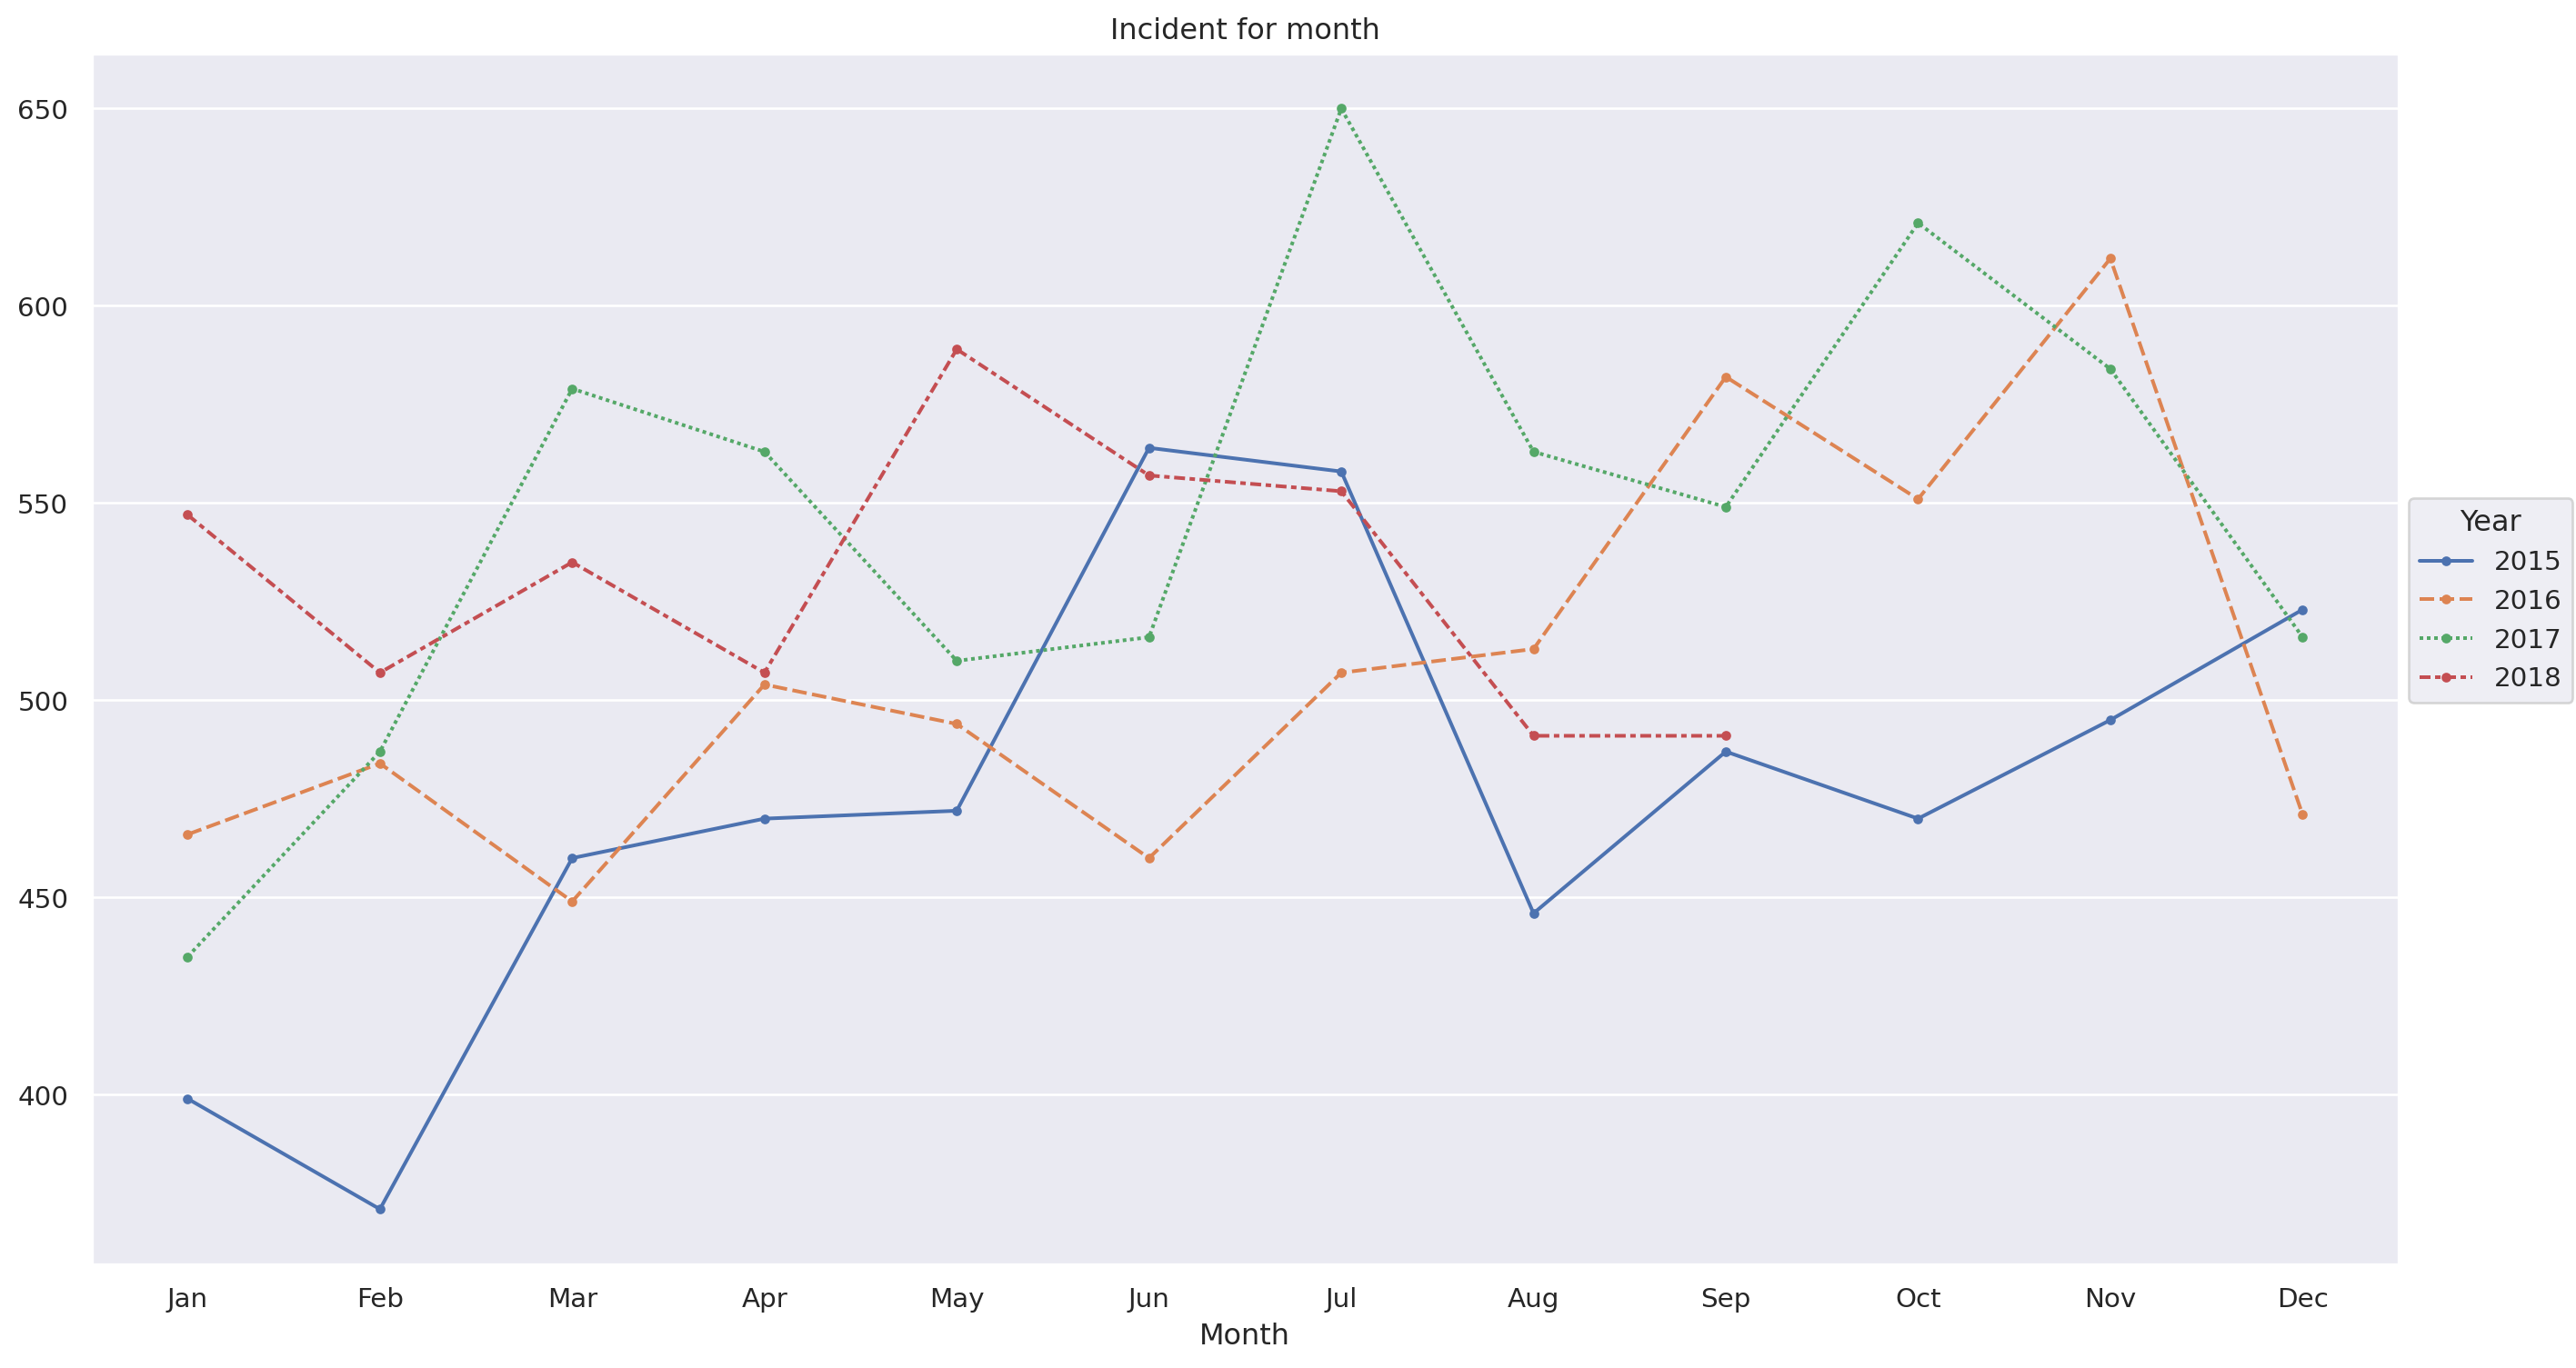

In [51]:
(
    so.Plot(count_incident, x='Month', y='Route', color='Year', linestyle='Year')
    .label(title='Incident for month', y='')
    .layout(size=(14,8))
    .add(so.Line(marker='.'))
)

A conclusão que tiro deste gráfico é que não existe uma diminuição significativa das ocorrência ao longo dos anos observados, existem picos e vales, com uma tendência de aumento dos incidentes.  
Os gráficos são muito estáveis, trabalham em um range restrito de 371 à 650 ocorrências.    
Corrobora com a informação anterior, onde parece faltar política para diminuição acentuada dos incidentes.

## Mais gráficos para facilitar a compreensão

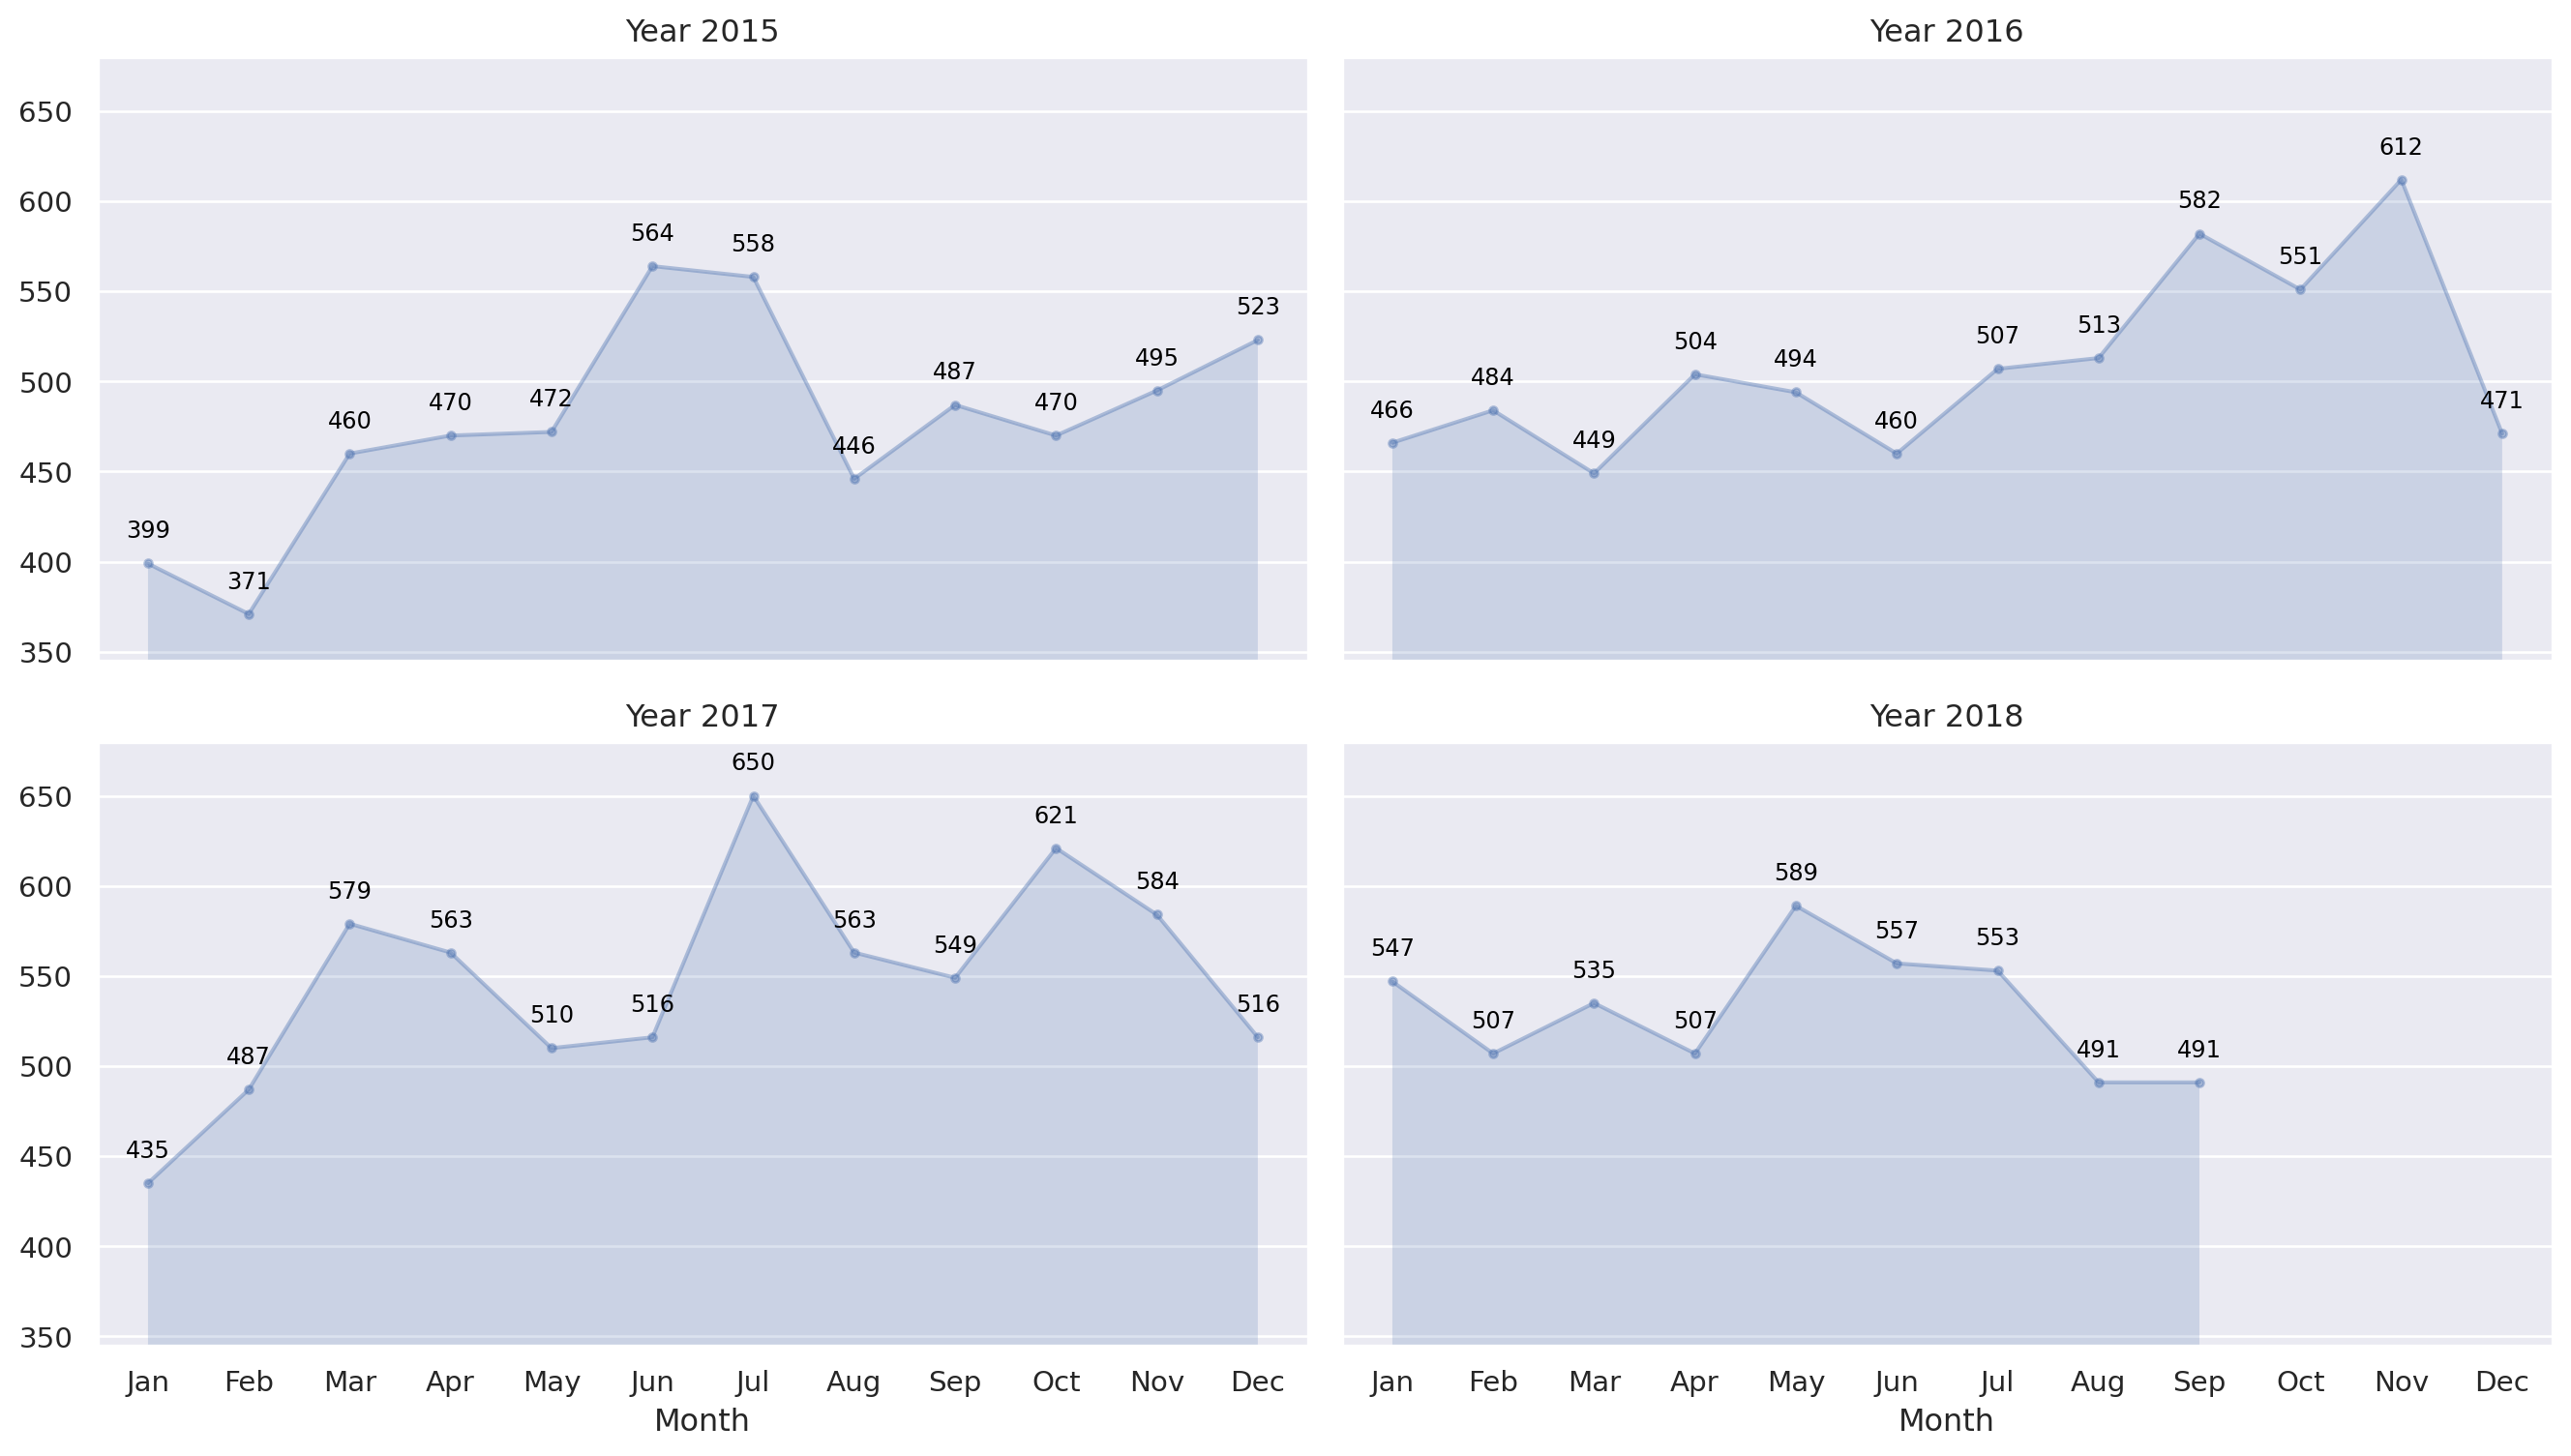

In [52]:
# Grid com incidentes por ano
(
    so.Plot(count_incident, x="Month", y="Route", text='Route')
    .layout(size=(14,8))
    .add(so.Line(marker='.', alpha=0.4)) # so.Line so.bar
    .label(x='Month', y='', title='Year {}'.format)
    .add(so.Text(valign='bottom', halign='center', color='black', alpha=1, fontsize=9, offset=8))
    .add(so.Area(edgewidth=0))
    .facet('Year', wrap=2)
    .limit(y=(345, 680))
)

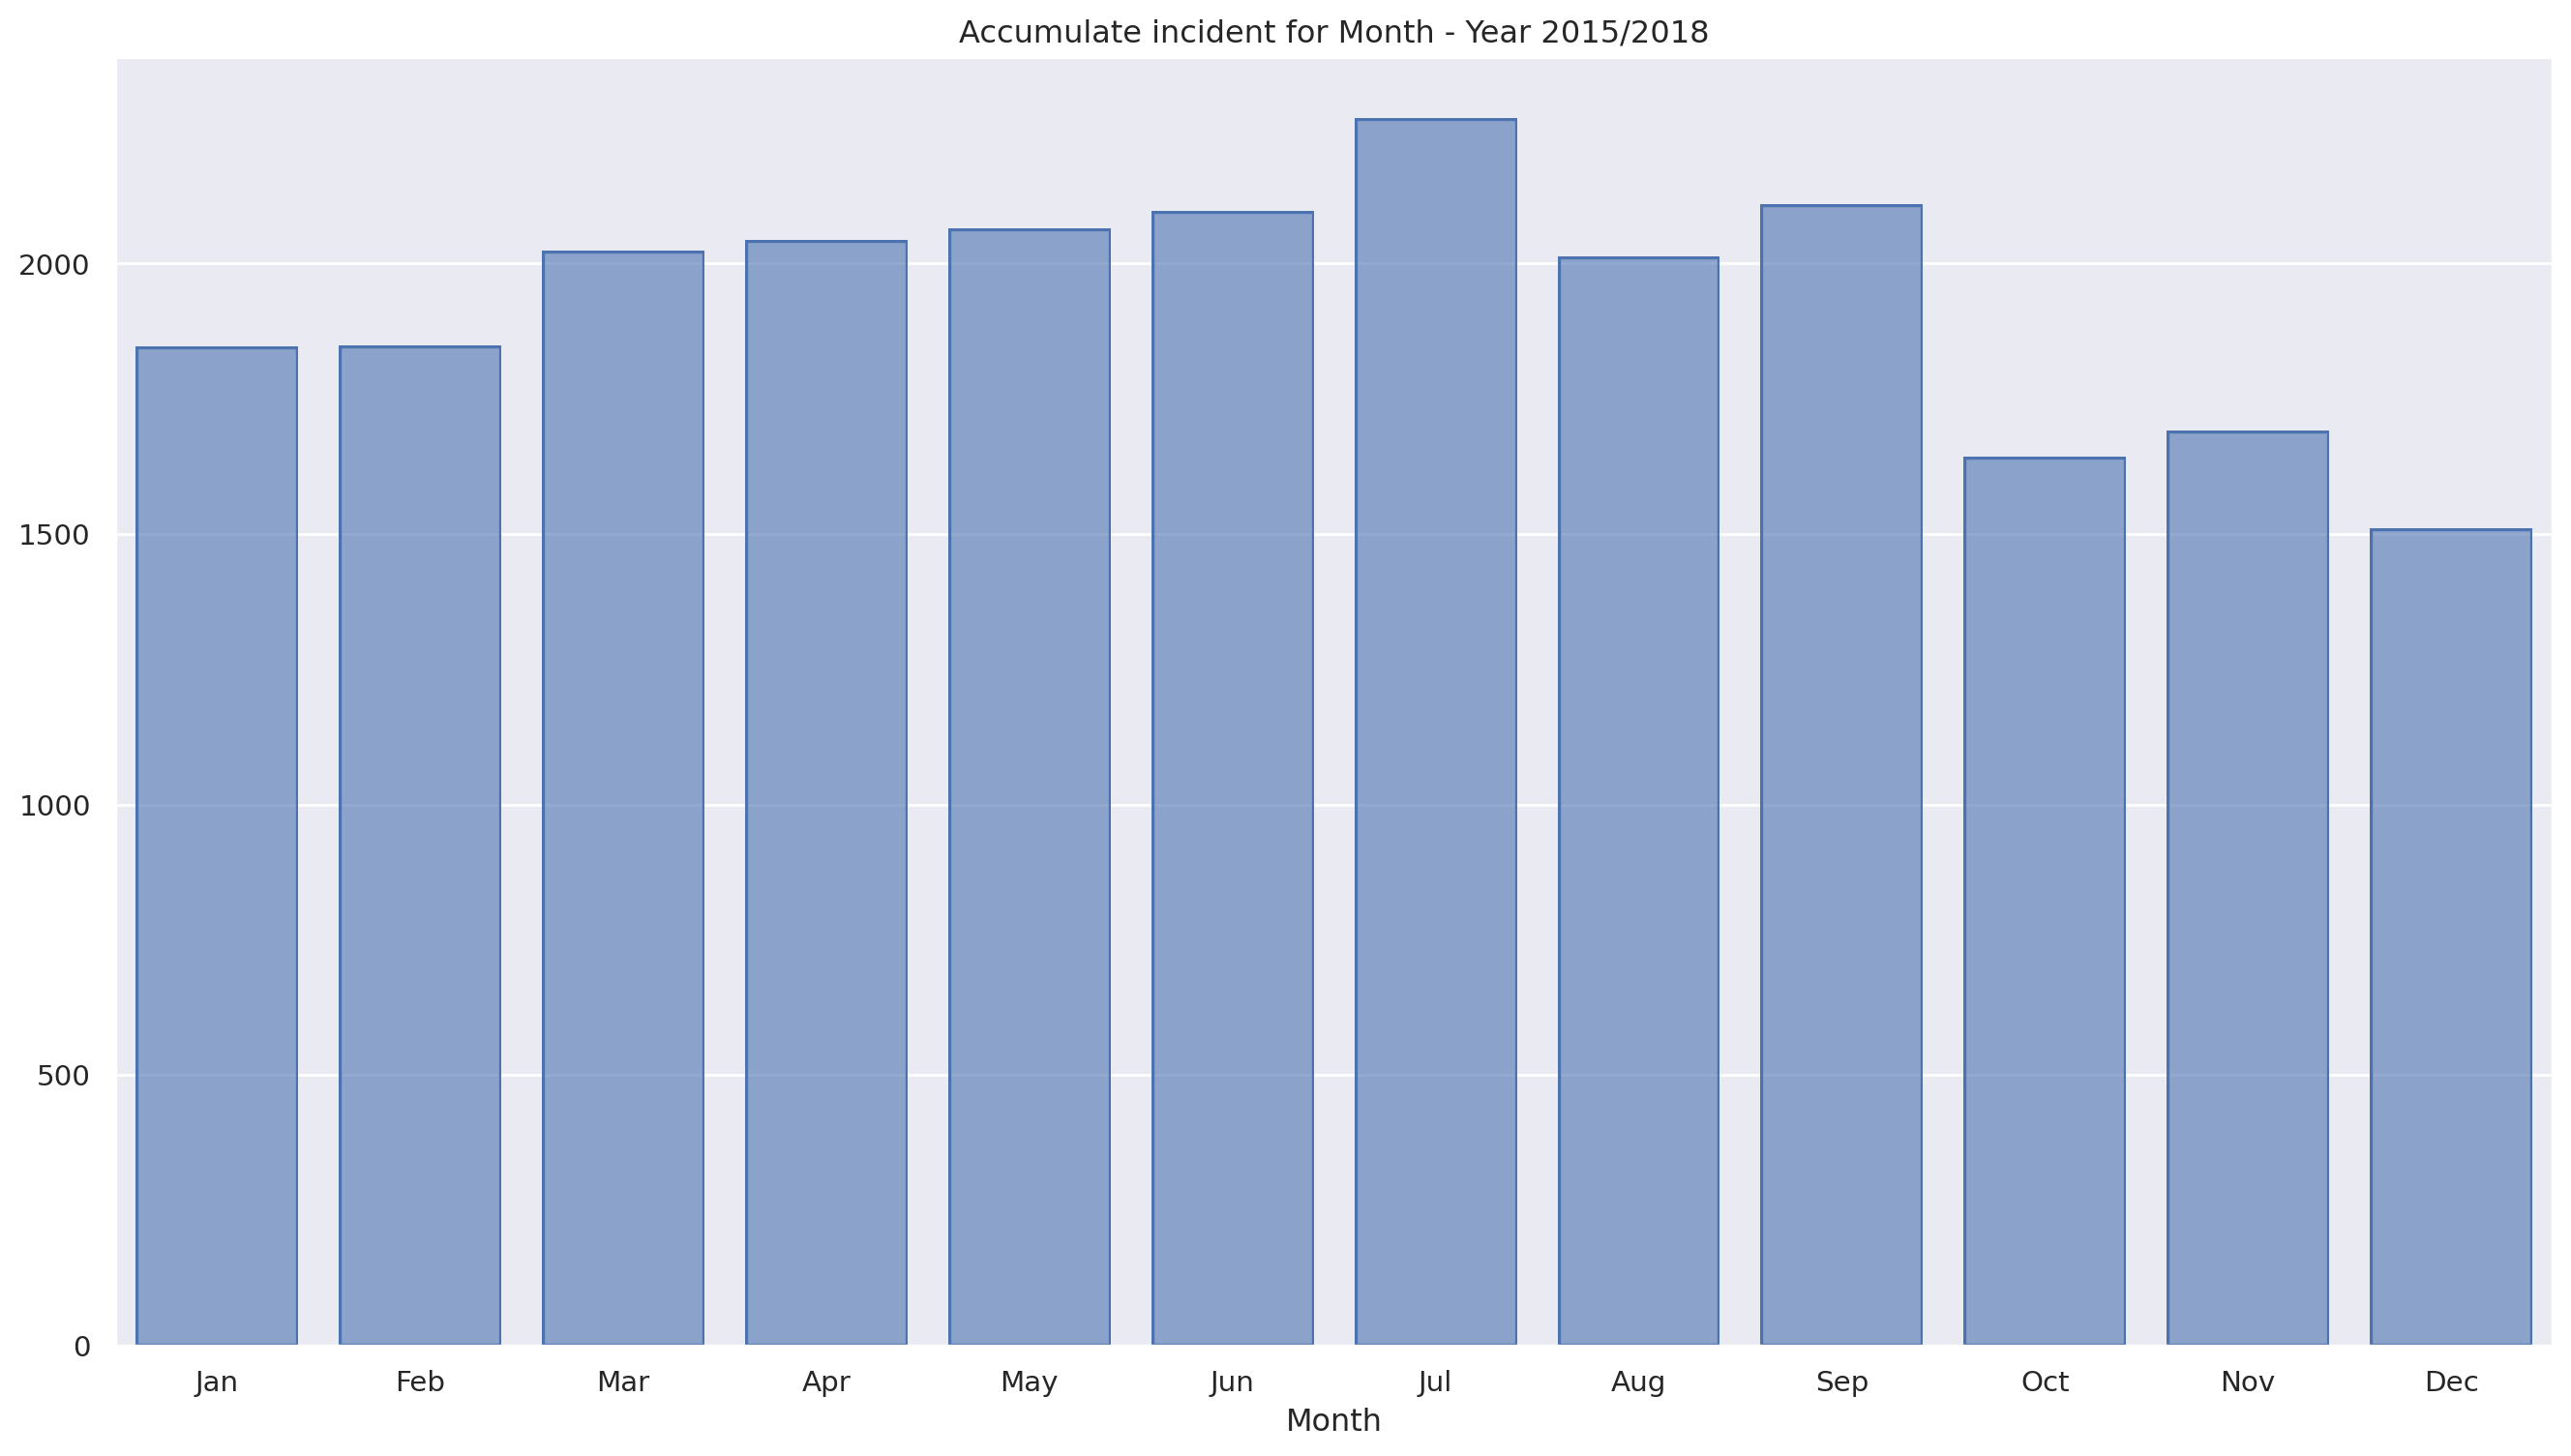

In [53]:
# Acumulado de incidentes por mês
(
    so.Plot(df, x="Month")
    .label(title='Accumulate incident for Month - Year 2015/2018')
    .layout(size=(14,8))
    .add(so.Bar(alpha=0.6), so.Count())
)

---

# 5- Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?  Separar incidente por mês e e sexo  

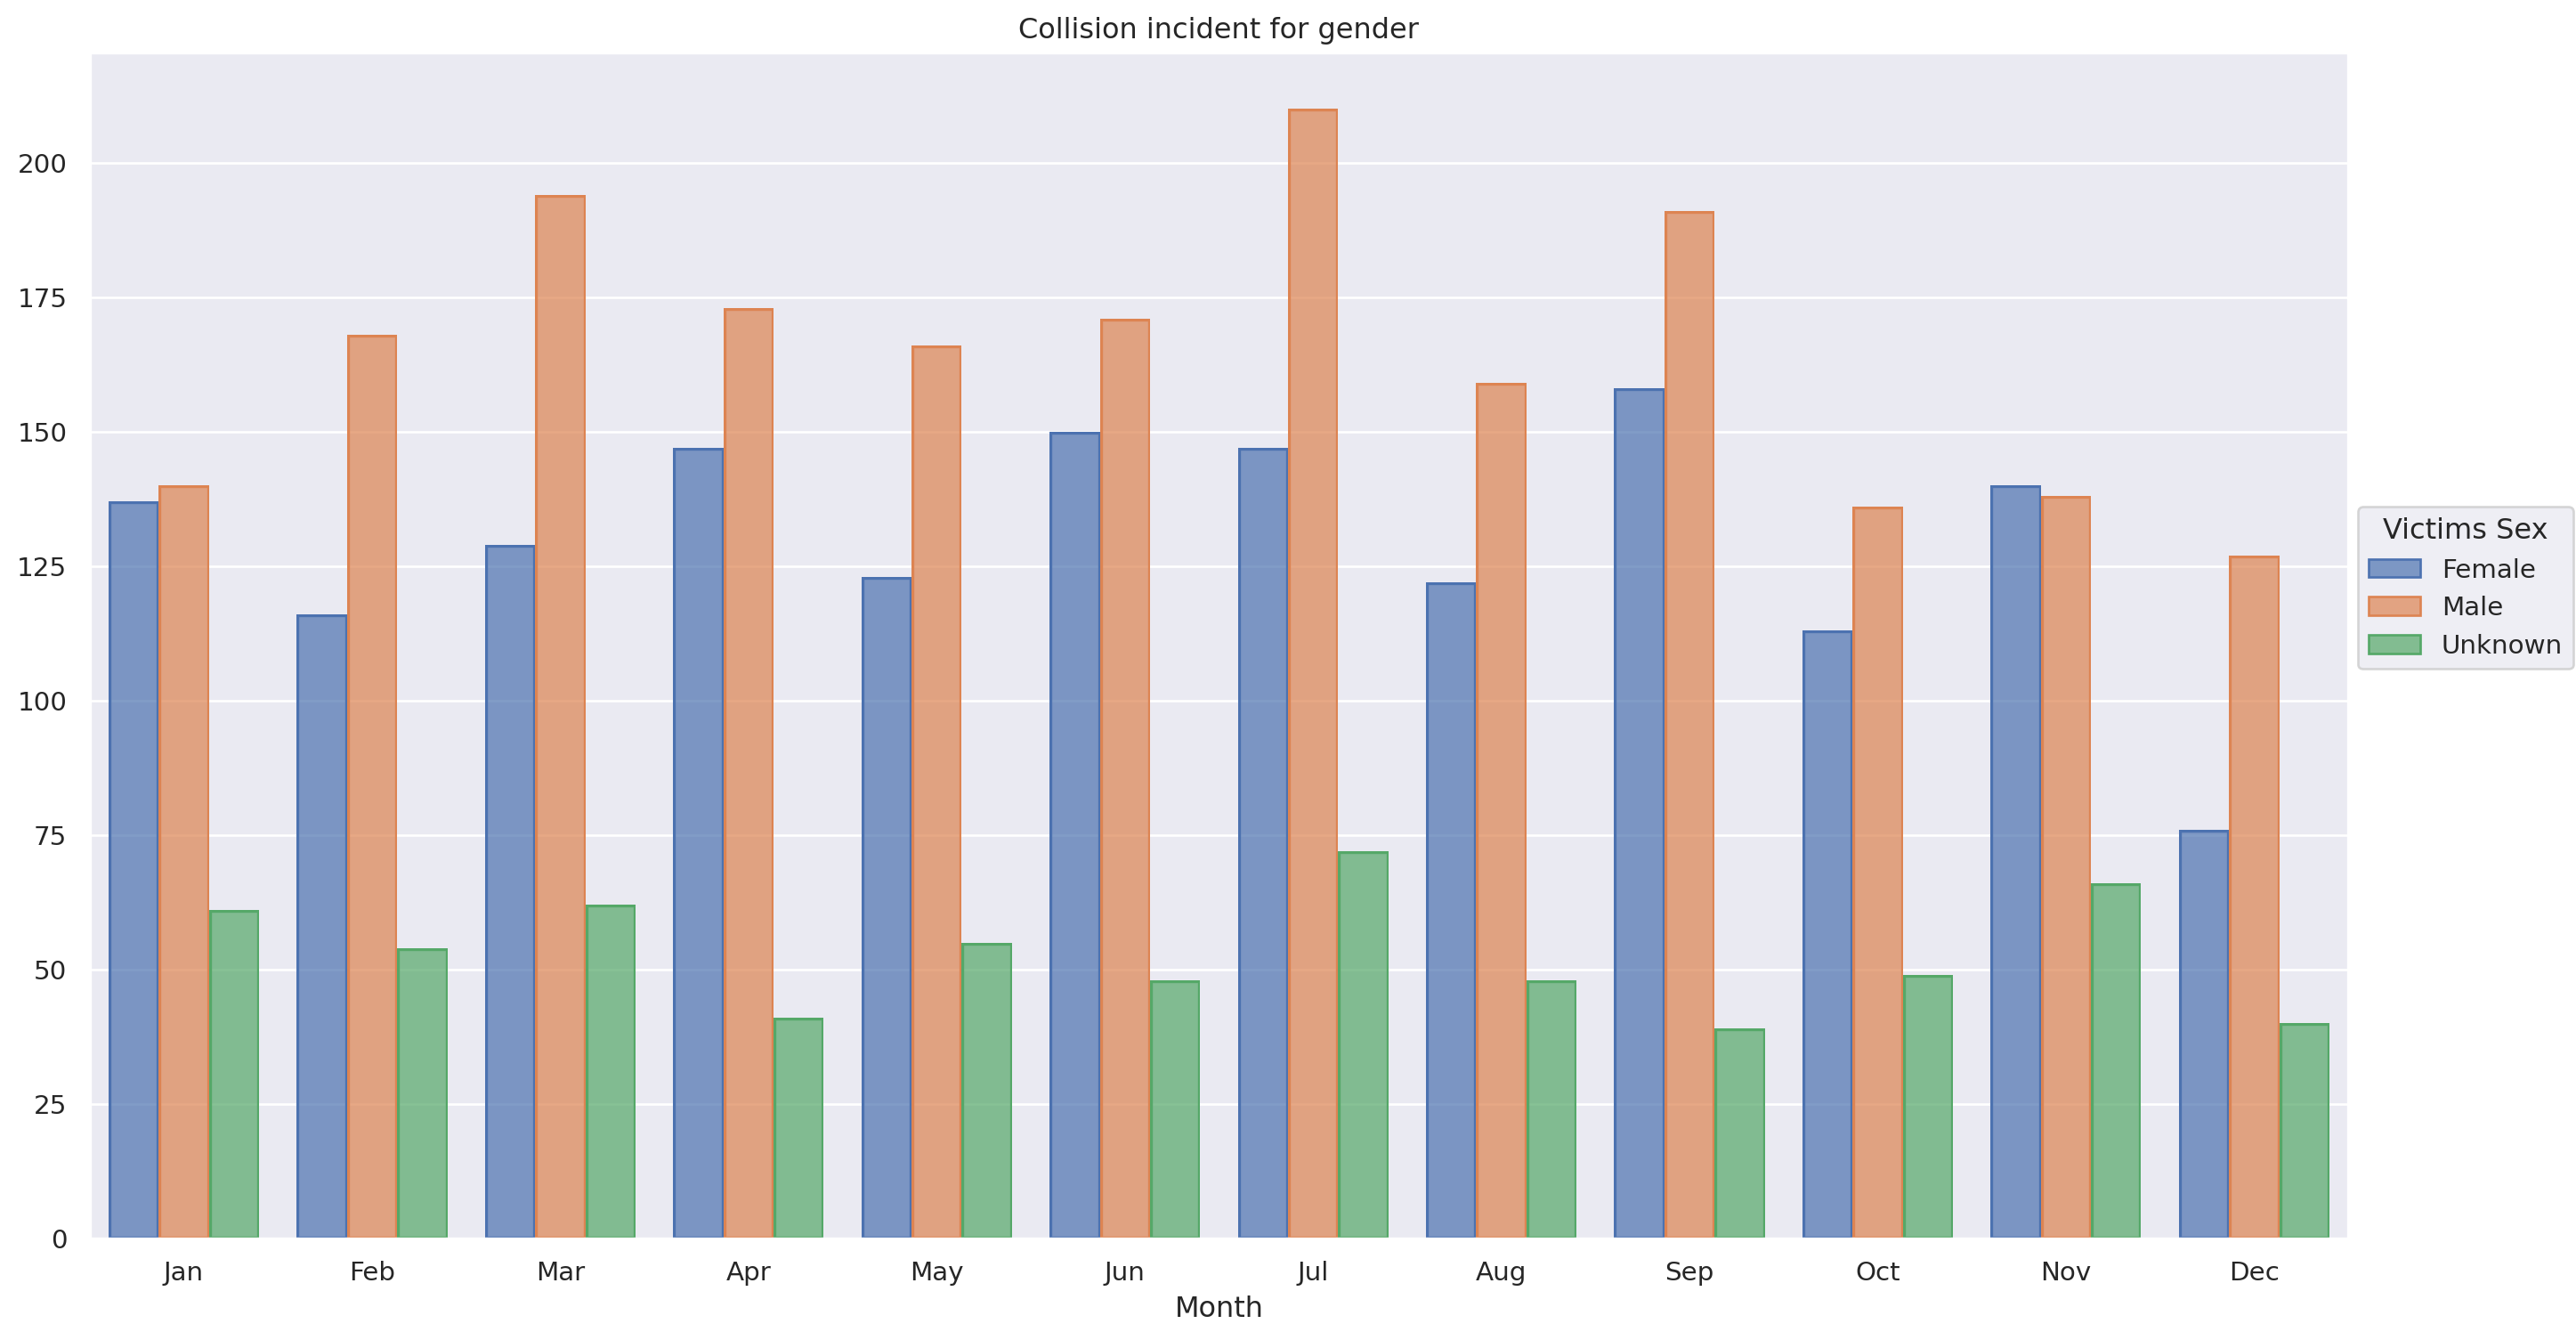

In [54]:
p5 = (
    so.Plot(df[df['Incident Event Type'] == 'Collision Incident'], x='Month', text='Incident Event Type')
    .layout(size=(14,8))
    .label(title='Collision incident for gender', y='', )
    .add(so.Bar(), so.Count(), so.Dodge(), color='Victims Sex')
)
p5

In [55]:
# cria dataframe com dados agrupados
col_inc_gender = pd.DataFrame(df[(df['Incident Event Type'] == 'Collision Incident') & (df['Victims Sex'] == 'Female')].groupby(['Month'], observed=True, as_index=False).count()[['Month','Year']])

In [56]:
# Renomeia colunas
col_inc_gender = col_inc_gender.rename(columns={'Year': 'Count'})

In [57]:
# Faz seleção de indice com maior contagem
col_inc_gender.iloc[col_inc_gender['Count'].idxmax(), :]

Month    Sep
Count    158
Name: 8, dtype: object

O mês que acumula o maior nível de incidentes envolvendo gênero feminino e colisão foi **setembro** com 158 eventos.

# 6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?  

In [58]:
df.head(1)

,Year,Month,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,Jan,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child


In [59]:
# Agrupa
df_child = df.groupby(['Month', 'Victims Age'], observed=False,as_index= False)['Year'].count()

In [60]:
df_child.shape

(60, 3)

In [61]:
# Soma quantidade de anos do dataframe
year_count = df.Year.unique().value_counts().sum()

In [62]:
# Calcula média
df_child['Mean'] = (df_child.Year / year_count)

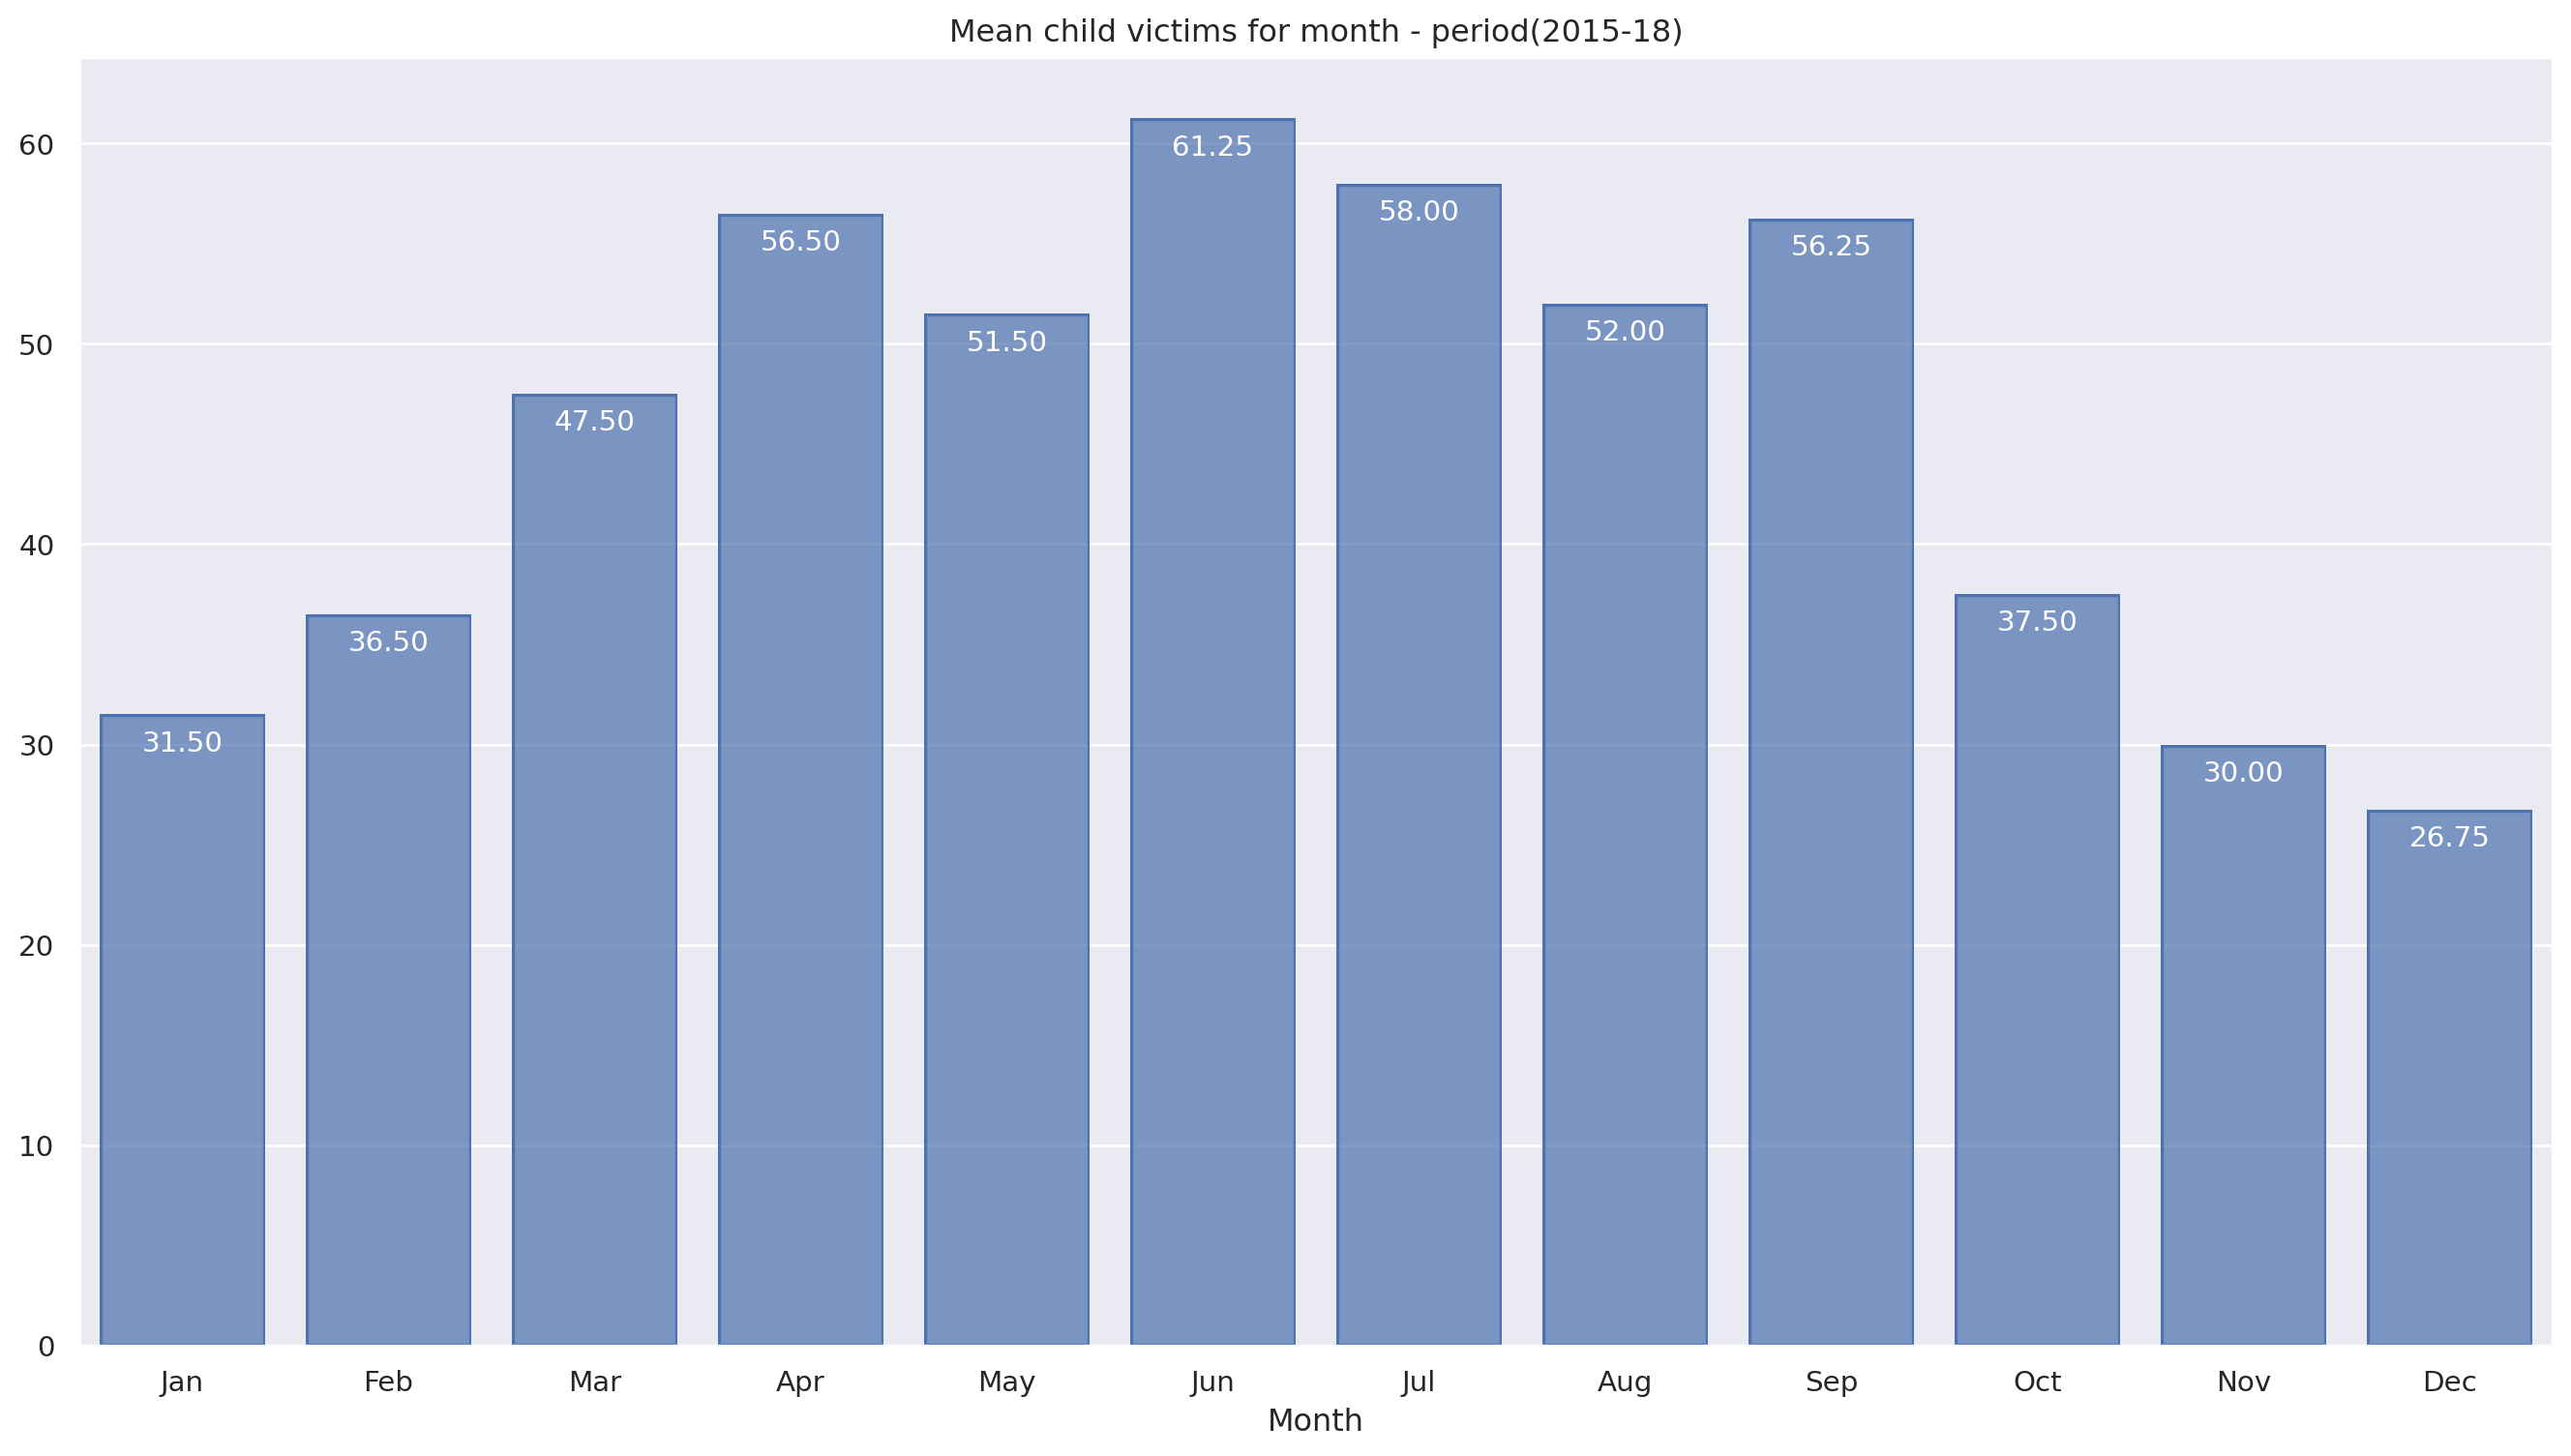

In [63]:
(
    so.Plot(df_child[df_child['Victims Age'] == 'Child'], x= 'Month', y= 'Mean', text=df_child['Mean'].apply(func.formata_numero))
    .layout(size=(14,8))
    .label(title='Mean child victims for month - period(2015-18)', y ='')
    .add(so.Bar())
    .add(so.Text(valign='top', halign='center', color='w', alpha=1, fontsize= 11, offset= 6))
)

---

# 7- Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?  

In [64]:
# Agrupa 
onscene = df.groupby(['Injury Result Description', 'Victims Sex'], observed=False, as_index=False)['Year'].count()

In [65]:
# Filtra 
onscene = onscene[onscene['Injury Result Description'] == 'Injuries treated on scene']

In [66]:
onscene

,Injury Result Description,Victims Sex,Year
3,Injuries treated on scene,Female,8816
4,Injuries treated on scene,Male,5632
5,Injuries treated on scene,Unknown,2888


In [67]:
onscene['Year'].sum()

17336

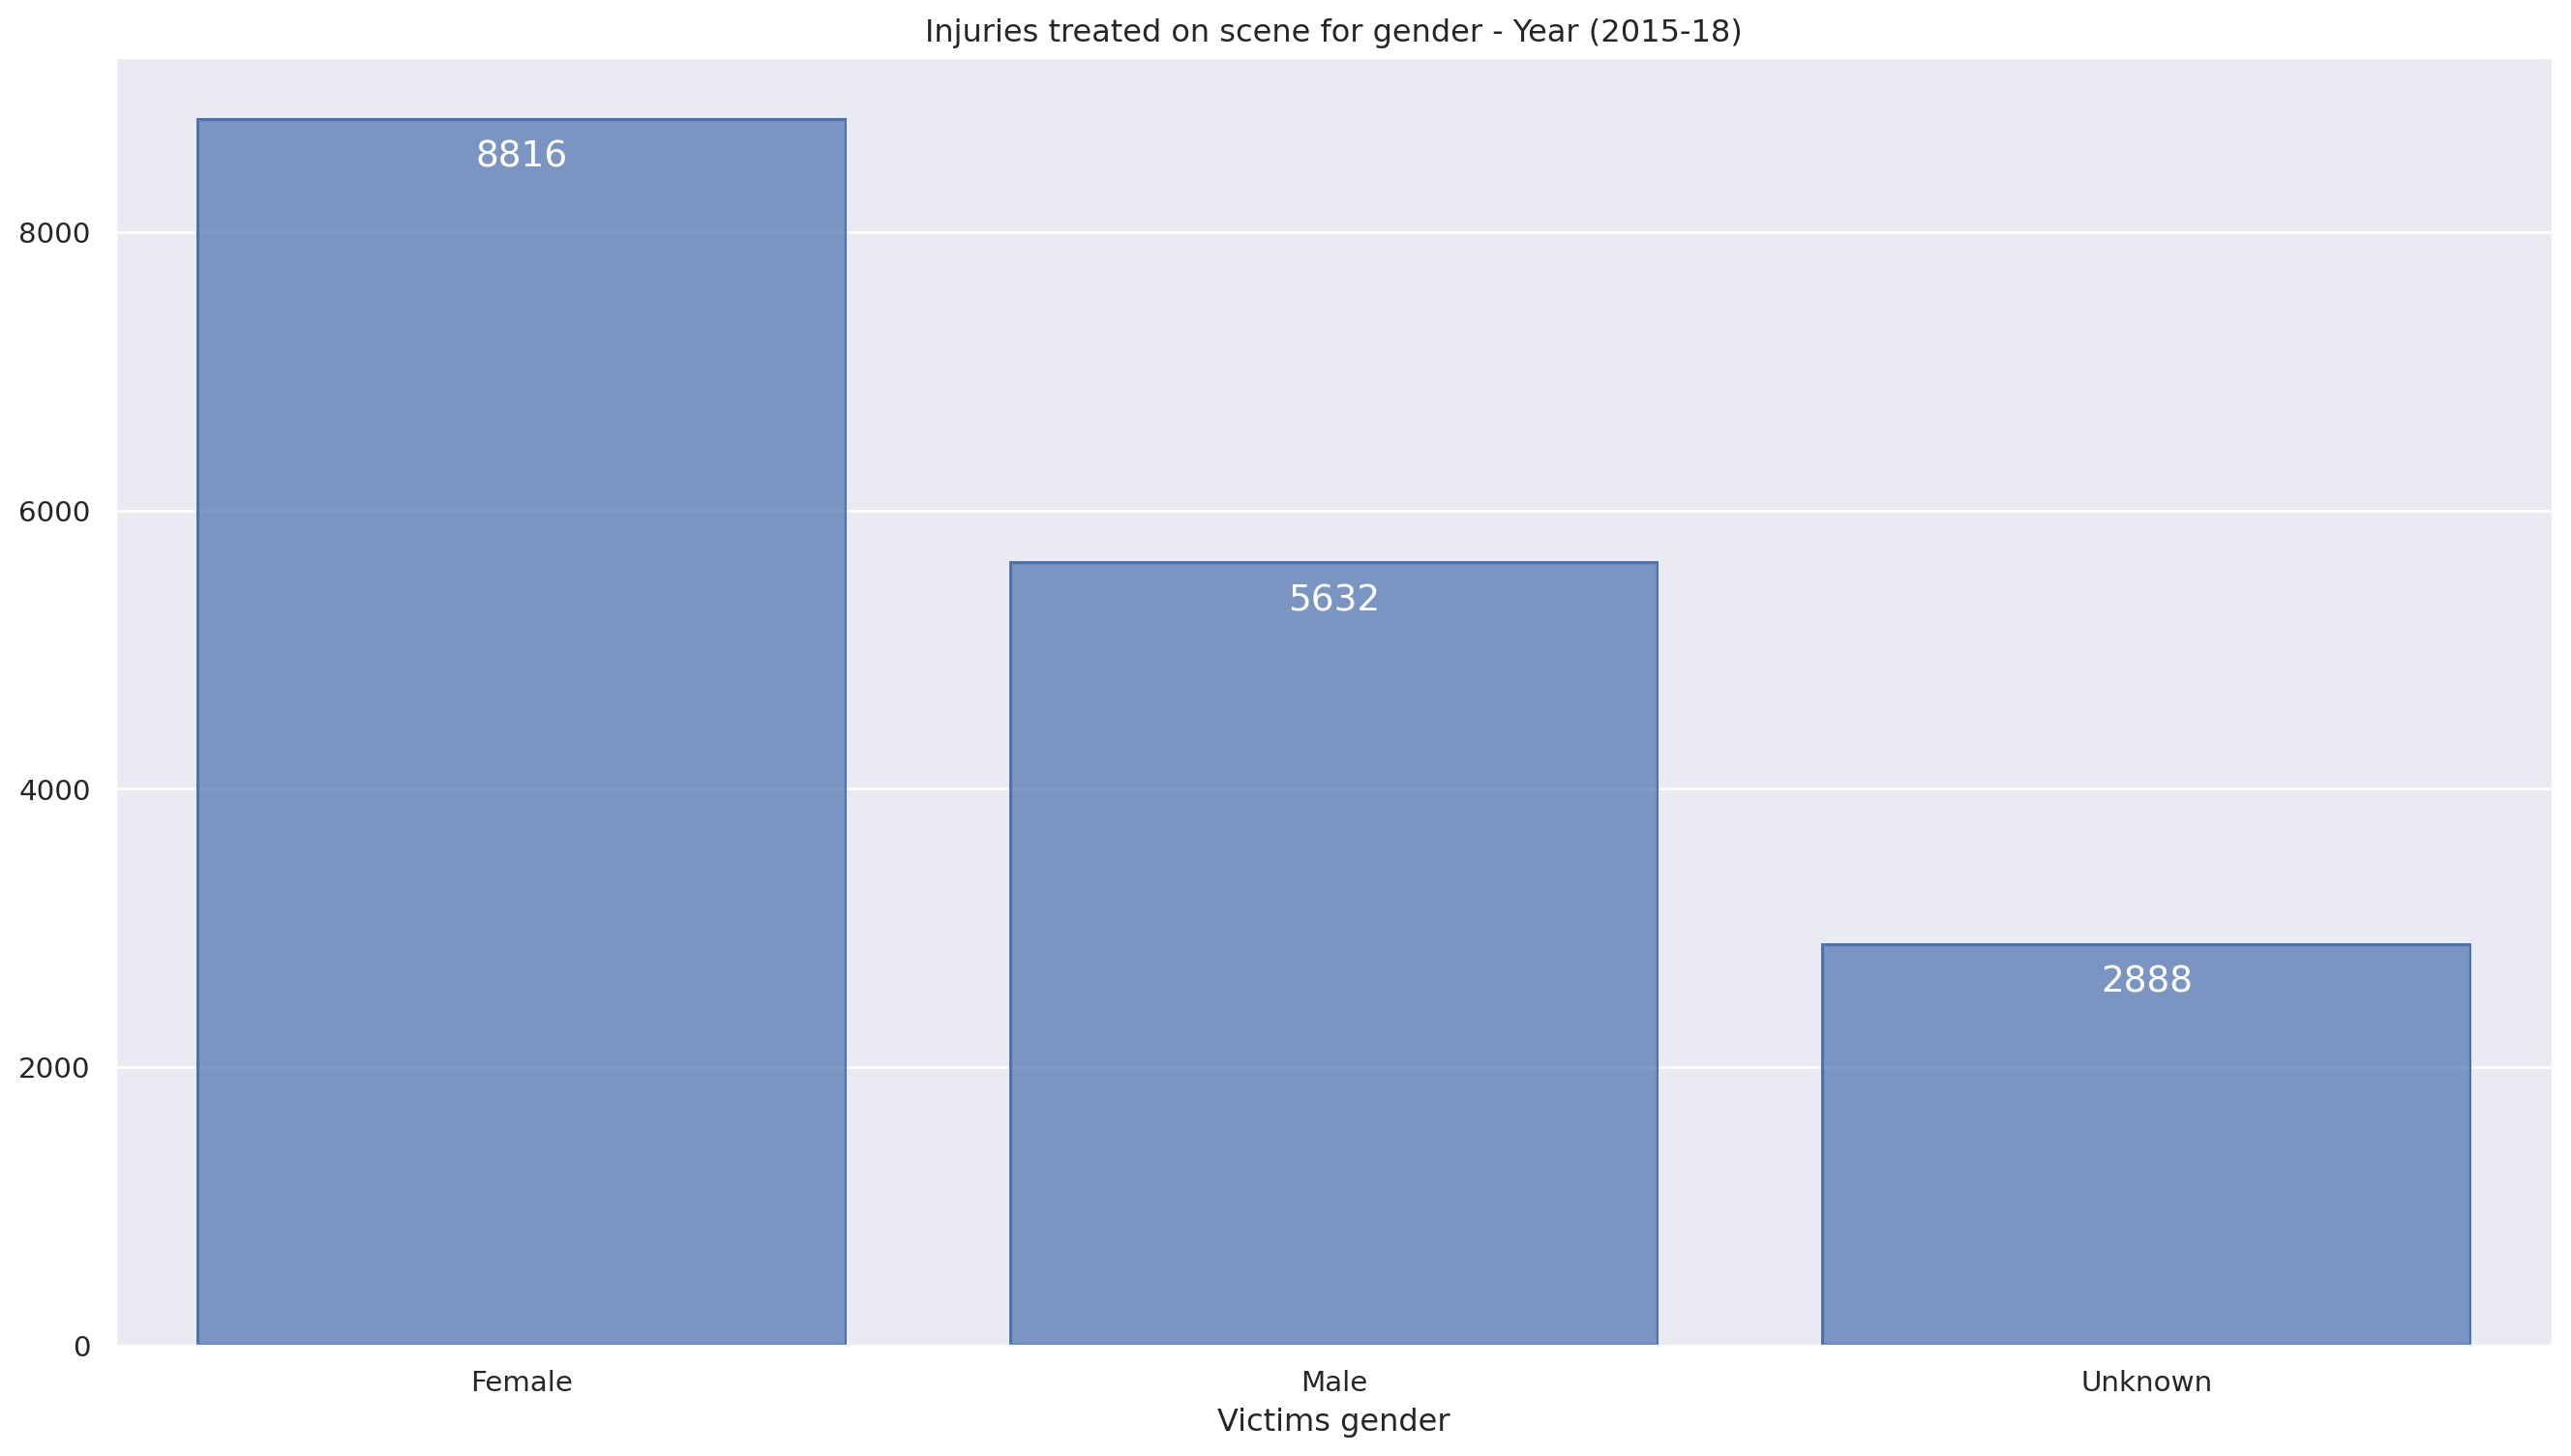

In [68]:
(
    so.Plot(onscene, x= 'Victims Sex', y= 'Year', text='Year')
    .layout(size=(14,8))
    .label(title='Injuries treated on scene for gender - Year (2015-18)', x= 'Victims gender', y='')
    .add(so.Bar())
    .add(so.Text(valign='top', halign='center', color='w', alpha=1, fontsize= 14, offset= 8))
)

---

# 8- No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?  

In [69]:
df.columns

Index(['Year', 'Month', 'Date Of Incident', 'Route', 'Operator', 'Group Name',
       'Bus Garage', 'Borough', 'Injury Result Description',
       'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age'],
      dtype='object')

In [70]:
# Agrupa
elderly = df.groupby(['Year', 'Month', 'Victims Age'], observed=False, as_index=False)['Route'].count()

In [71]:
elderly

,Year,Month,Victims Age,Route
0,2015,Jan,Adult,152
1,2015,Jan,Child,31
2,2015,Jan,Elderly,48
3,2015,Jan,Unknown,163
4,2015,Jan,Youth,5
...,...,...,...,...
235,2018,Dec,Adult,0
236,2018,Dec,Child,0
237,2018,Dec,Elderly,0
238,2018,Dec,Unknown,0


In [72]:
# Faz o filtro por idade e ano
elderly = elderly[(elderly['Victims Age'] == 'Elderly') & (elderly['Year'] == 2017)]

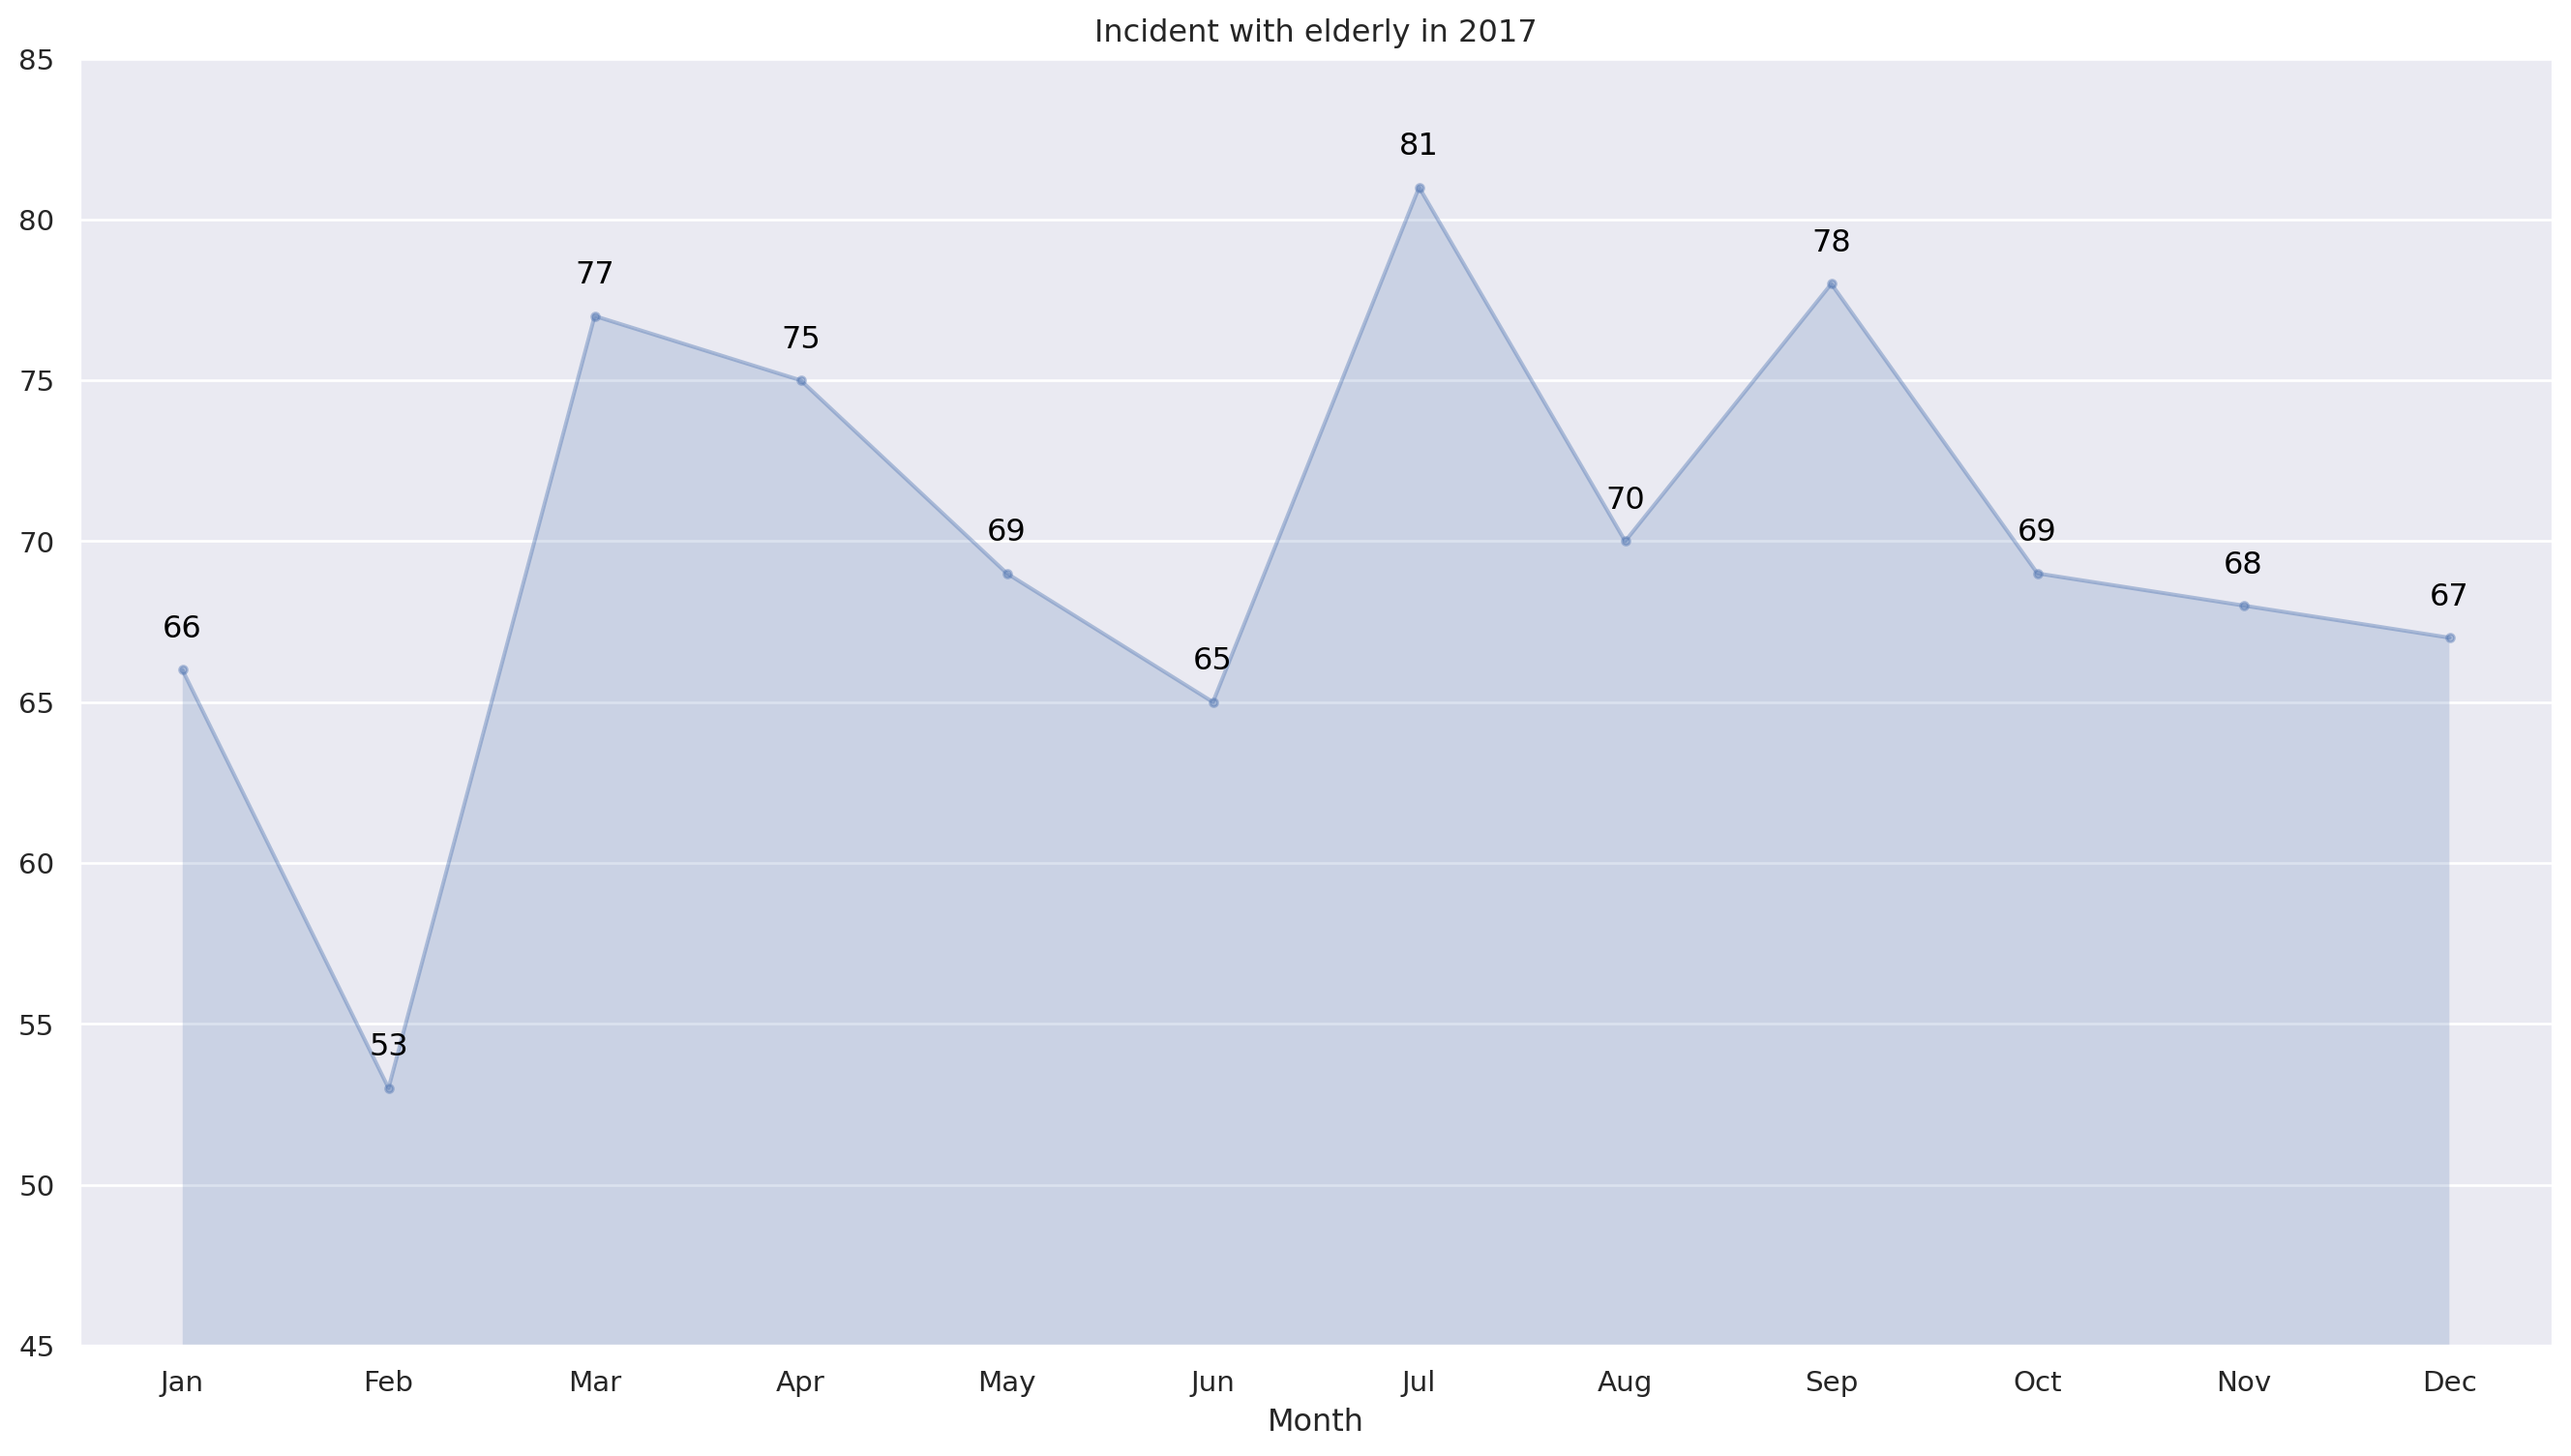

In [73]:
(
    so.Plot(elderly, x='Month', y='Route', text='Route')
    .layout(size=(14,8))
    .label(title='Incident with elderly in 2017', y='')
    .add(so.Line(marker='.', alpha=0.4))
    .add(so.Text(valign='bottom', halign='center', color='black', alpha=1, fontsize=12, offset=10))
    .add(so.Area(edgewidth=0))
    .limit(y=(45, None))
)

Observamos que o pico de ocorrências no ano de 2017 com idodos foi no **mês de Julho** com 81 casos.

---

# 9- Considerando o Operador qual a distribuição de incidentes ao longo do tempo?  

In [92]:
# Agrupa
operator = df.groupby('Operator', observed=False, as_index=False)['Year'].count().sort_values(by='Year', ascending=False).reset_index(drop=True)
operator.head()

,Operator,Year
0,Metroline,3457
1,Arriva London North,3208
2,East London,2402
3,London United,2263
4,Selkent,1808


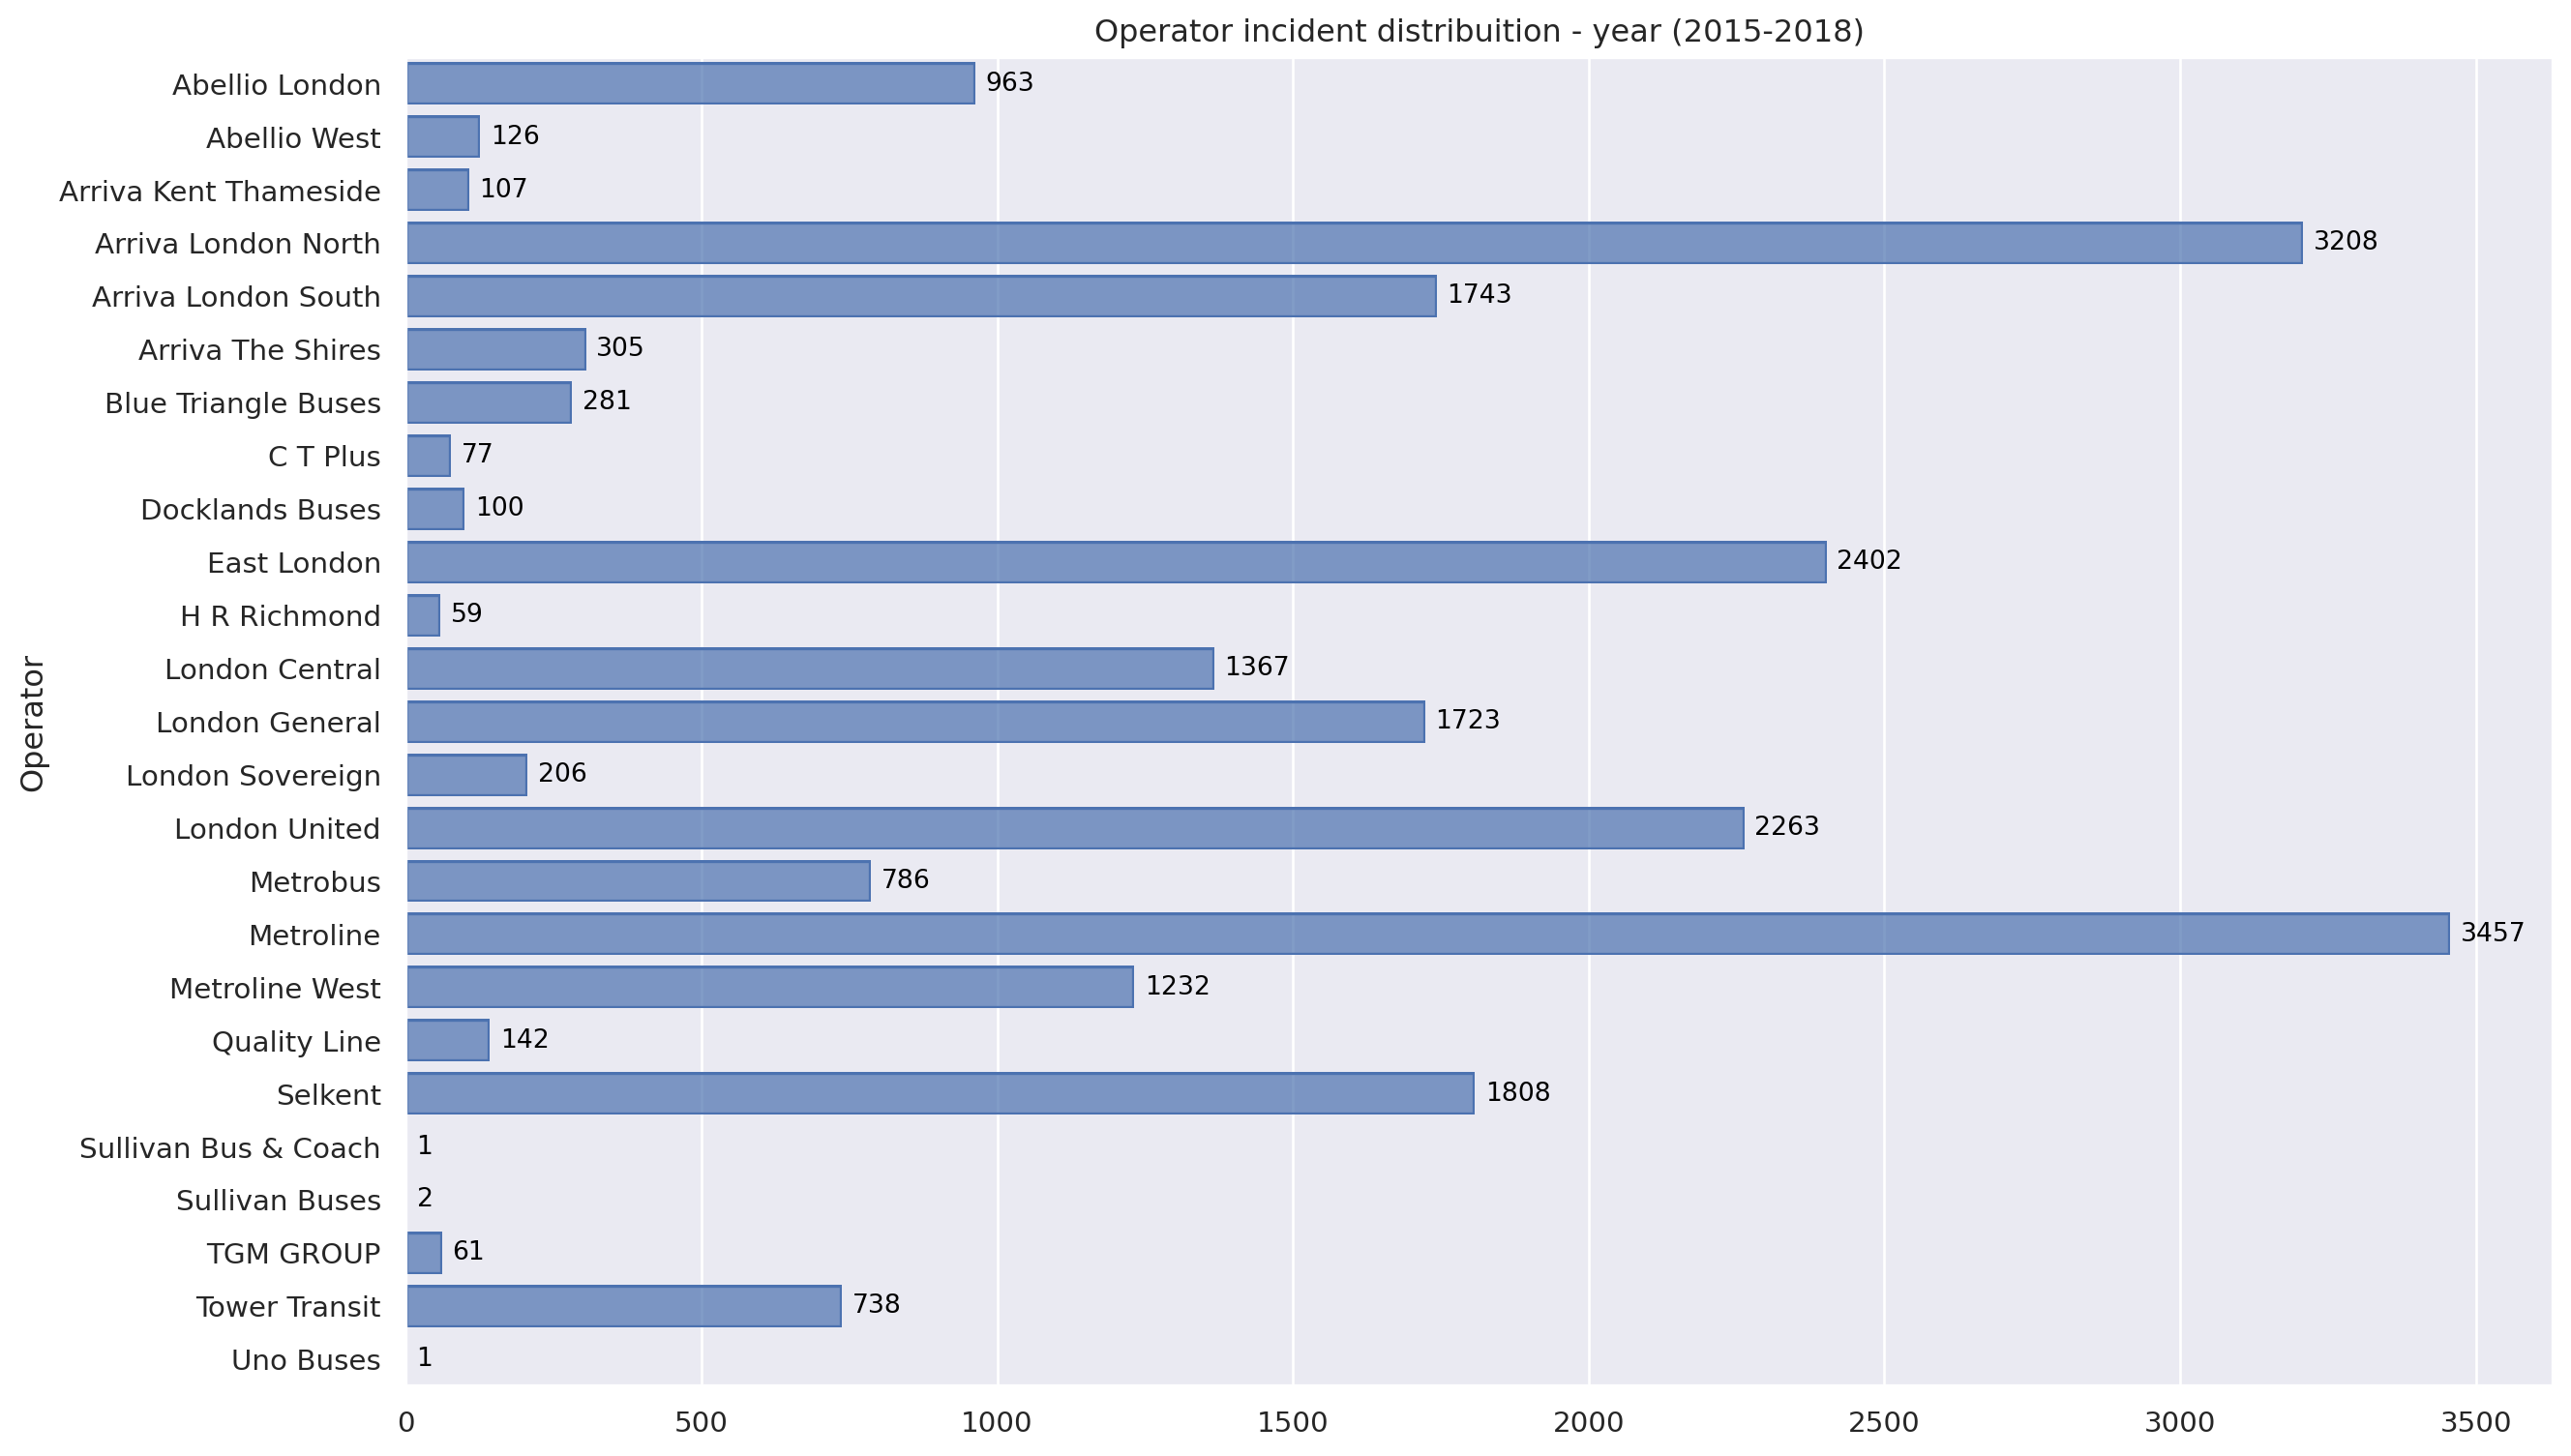

In [93]:
(
    so.Plot(operator, x='Year', y='Operator', text='Year')
    .layout(size=(14,8))
    .label(title='Operator incident distribuition - year (2015-2018)', x='')
    .add(so.Bar())
    .add(so.Text(valign='center', halign='left', color='black', alpha=1, fontsize=10, offset=4))
)

---

# 10- Qual o tipo de incidente mais comum com ciclistas?

In [51]:
df.columns

Index(['Year', 'Month', 'Date Of Incident', 'Route', 'Operator', 'Group Name',
       'Bus Garage', 'Borough', 'Injury Result Description',
       'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age'],
      dtype='object')

In [52]:
# Verifica palavras únicas
df['Victim Category'].unique()

['Passenger', 'Pedestrian', 'Conductor', 'Bus Driver', 'Member Of Public', ..., 'TfL Staff', 'Operations staff (other)', 'Cyclist ', 'Motorcyclist ', 'Insufficient Data']
Length: 17
Categories (17, object): ['3rd Party driver / Occupant', 'Bus Driver', 'Conductor', 'Contractor Staff', ..., 'Other', 'Passenger', 'Pedestrian', 'TfL Staff']

In [53]:
# Remove espaços no início e final das palavras
df['Victim Category'] = df['Victim Category'].str.strip()

In [54]:
# Filtra somente ciclistas
cyclist = df[df['Victim Category'] == 'Cyclist']

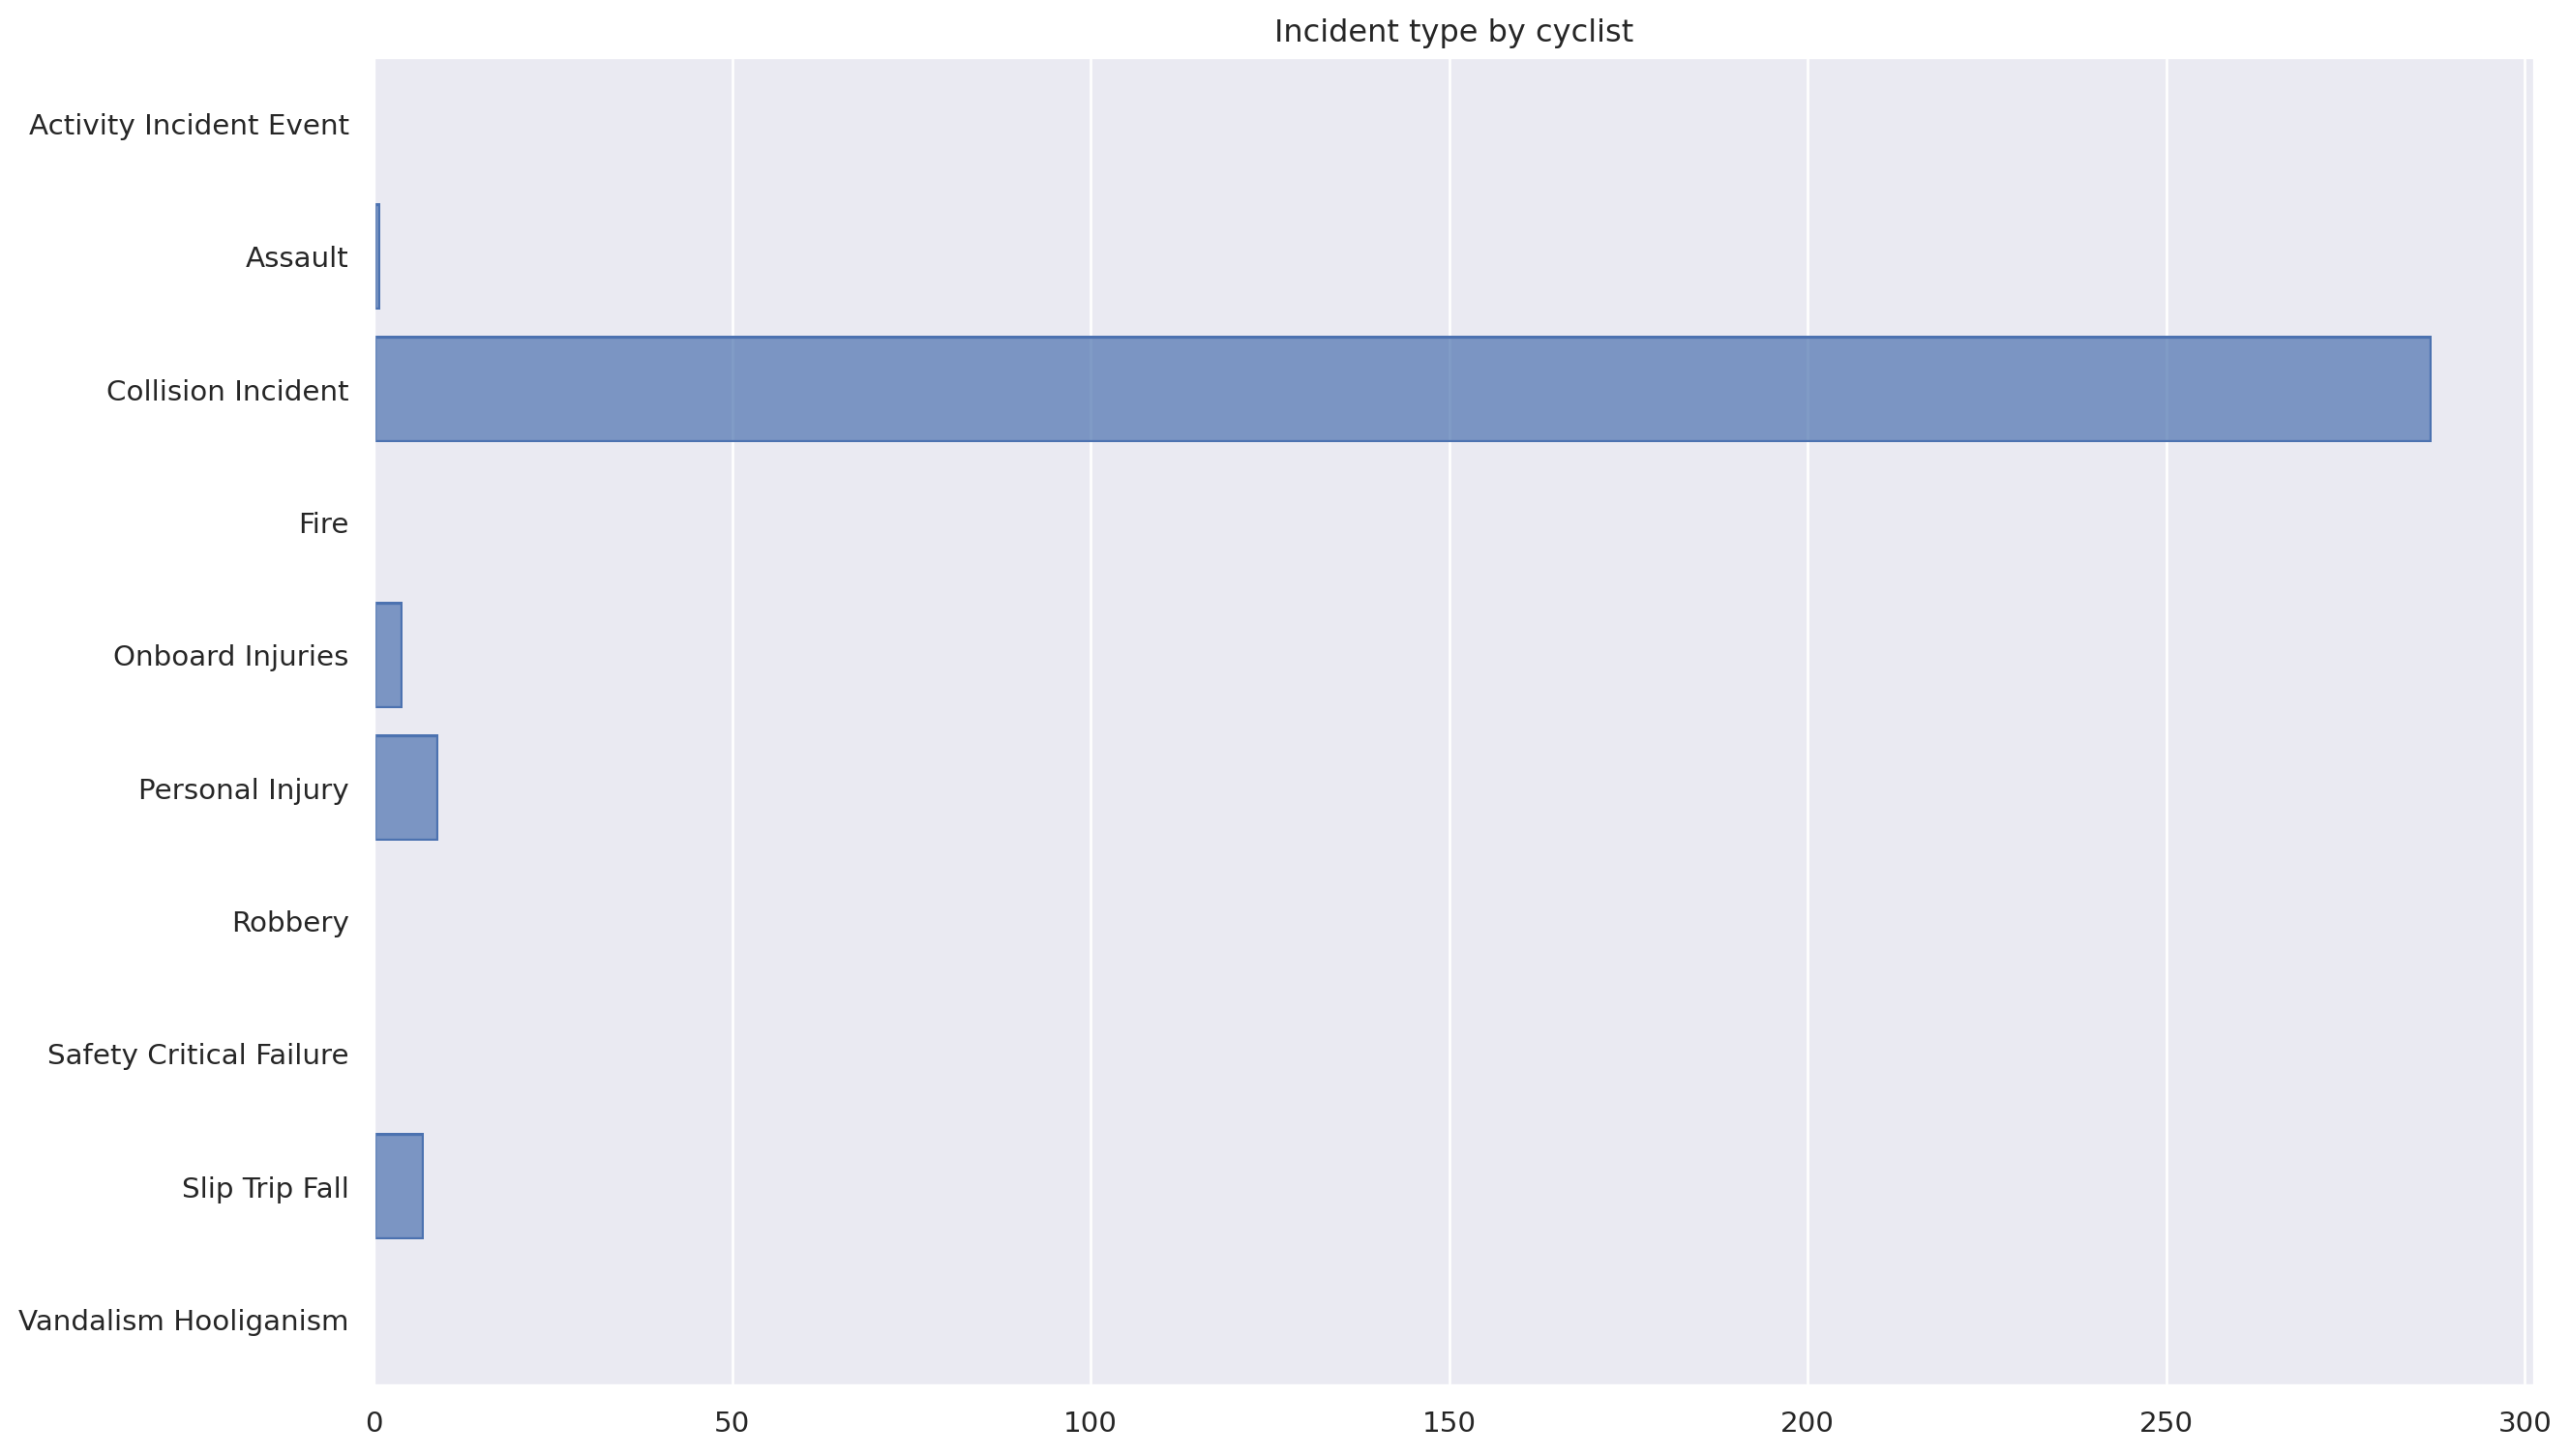

In [55]:
(
    so.Plot(cyclist, y='Incident Event Type')
    .layout(size=(14,8))
    .label(title='Incident type by cyclist', y='')
    .add(so.Bar(), so.Count())
)

In [56]:
# Cria dataframe com contagem dos resultados
incident_cyclist = pd.DataFrame(cyclist.groupby('Incident Event Type', observed=False,as_index= False)['Route'].count()).rename(columns={'Route': 'Count'})
incident_cyclist

,Incident Event Type,Count
0,Activity Incident Event,0
1,Assault,1
2,Collision Incident,287
3,Fire,0
4,Onboard Injuries,4
5,Personal Injury,9
6,Robbery,0
7,Safety Critical Failure,0
8,Slip Trip Fall,7
9,Vandalism Hooliganism,0


Como seria de esperar o incidente com maior incidência foi de colisão com 287 casos.  